MAE: 626.0719320186157
MSE: 696042.4794852363
RMSE: 834.2916033889088
R2 Score: -0.006747481898628616


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

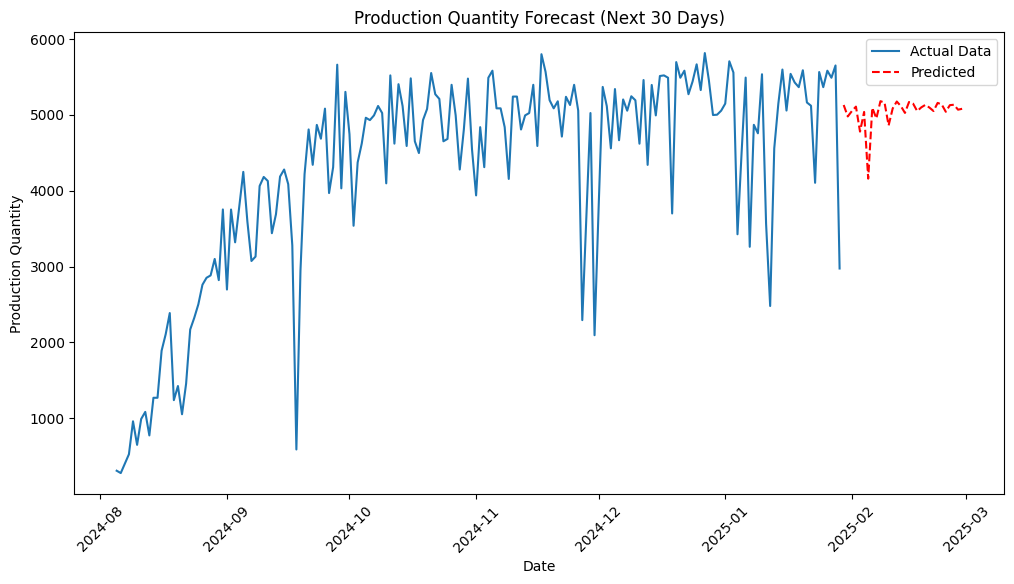

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "/content/Total production.XLSX"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Drop irrelevant columns
columns_to_drop = [
    "Purchase Order", "Order Price Unit", "Special Stock", "Asset", "WBS Element",
    "Consumption", "Cost Center", "Customer", "Receipt Indicator", "Reason for Movement",
    "Document Header Text", "Reference", "Time of Entry", "Counter", "Currency",
    "Debit/Credit Ind.", "Item", "Item No.Stock Transfer Reserv.", "Material Doc. Year", "Reservation"
]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

# Convert Posting Date to datetime
df["Posting Date"] = pd.to_datetime(df["Posting Date"])

# Aggregate production quantity by date
df_daily = df.groupby("Posting Date")["Qty in Un. of Entry"].sum().reset_index()
df_daily = df_daily.sort_values("Posting Date")

# Create lag features for better predictions
for lag in range(1, 8):  # Using past 7 days as features
    df_daily[f"Lag_{lag}"] = df_daily["Qty in Un. of Entry"].shift(lag)

# Drop NaN values due to shifting
df_daily = df_daily.dropna()

# Create a time index
df_daily["Day"] = np.arange(len(df_daily))

# Split data into training and testing
train_size = int(len(df_daily) * 0.8)
train, test = df_daily.iloc[:train_size], df_daily.iloc[train_size:]
X_train = train[["Day"] + [f"Lag_{lag}" for lag in range(1, 8)]]
y_train = train["Qty in Un. of Entry"]
X_test = test[["Day"] + [f"Lag_{lag}" for lag in range(1, 8)]]
y_test = test["Qty in Un. of Entry"]

# Train Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predictions on test set
y_pred = model.predict(X_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

# Predict next 30 days iteratively
future_predictions = []
future_days = np.arange(len(df_daily), len(df_daily) + 30)
last_known_values = df_daily.iloc[-7:]["Qty in Un. of Entry"].values.tolist()

for day in future_days:
    input_features = [day] + last_known_values[-7:]
    predicted_qty = model.predict([input_features])[0]
    future_predictions.append(predicted_qty)
    last_known_values.append(predicted_qty)

# Generate future dates
last_date = df_daily["Posting Date"].max()
future_dates = [last_date + datetime.timedelta(days=i) for i in range(1, 31)]

# Create forecast DataFrame
df_forecast = pd.DataFrame({"Posting Date": future_dates, "Predicted Qty": future_predictions})

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df_daily["Posting Date"], df_daily["Qty in Un. of Entry"], label="Actual Data")
plt.plot(future_dates, future_predictions, label="Predicted", linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Production Quantity")
plt.title("Production Quantity Forecast (Next 30 Days)")
plt.legend()
plt.xticks(rotation=45)
plt.show()


MAE: 829.4603174603175
MSE: 1535189.668792517
RMSE: 1239.027711067237
R2 Score: -1.2204798971992035


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

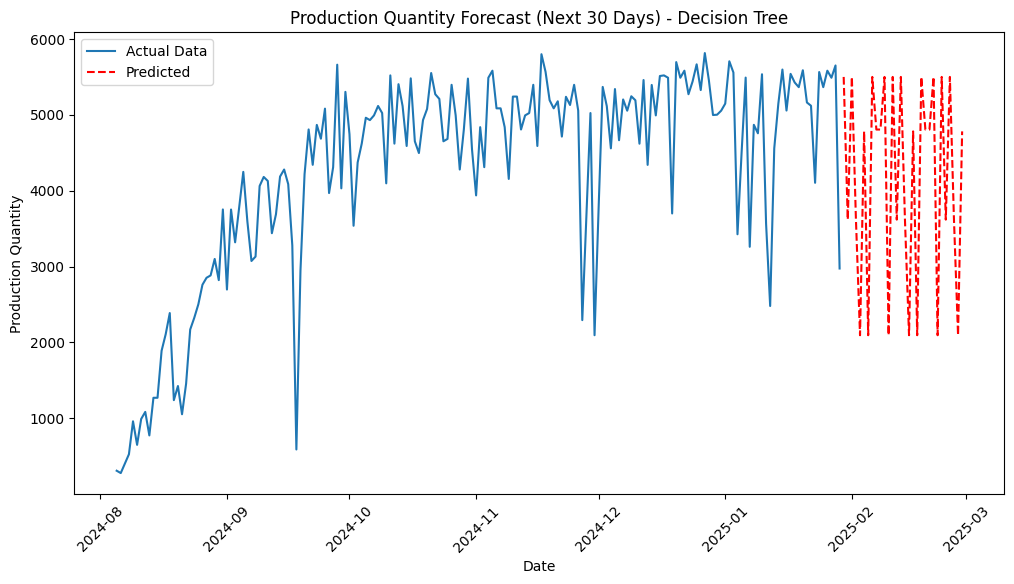

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "/content/Total production.XLSX"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Drop irrelevant columns
columns_to_drop = [
    "Purchase Order", "Order Price Unit", "Special Stock", "Asset", "WBS Element",
    "Consumption", "Cost Center", "Customer", "Receipt Indicator", "Reason for Movement",
    "Document Header Text", "Reference", "Time of Entry", "Counter", "Currency",
    "Debit/Credit Ind.", "Item", "Item No.Stock Transfer Reserv.", "Material Doc. Year", "Reservation"
]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

# Convert Posting Date to datetime
df["Posting Date"] = pd.to_datetime(df["Posting Date"])

# Aggregate production quantity by date
df_daily = df.groupby("Posting Date")["Qty in Un. of Entry"].sum().reset_index()
df_daily = df_daily.sort_values("Posting Date")

# Create lag features for better predictions
for lag in range(1, 8):  # Using past 7 days as features
    df_daily[f"Lag_{lag}"] = df_daily["Qty in Un. of Entry"].shift(lag)

# Drop NaN values due to shifting
df_daily = df_daily.dropna()

# Create a time index
df_daily["Day"] = np.arange(len(df_daily))

# Split data into training and testing
train_size = int(len(df_daily) * 0.8)
train, test = df_daily.iloc[:train_size], df_daily.iloc[train_size:]
X_train = train[["Day"] + [f"Lag_{lag}" for lag in range(1, 8)]]
y_train = train["Qty in Un. of Entry"]
X_test = test[["Day"] + [f"Lag_{lag}" for lag in range(1, 8)]]
y_test = test["Qty in Un. of Entry"]

# Train Decision Tree Regressor model
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predictions on test set
y_pred = model.predict(X_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

# Predict next 30 days iteratively
future_predictions = []
future_days = np.arange(len(df_daily), len(df_daily) + 30)
last_known_values = df_daily.iloc[-7:]["Qty in Un. of Entry"].values.tolist()

for day in future_days:
    input_features = [day] + last_known_values[-7:]
    predicted_qty = model.predict([input_features])[0]
    future_predictions.append(predicted_qty)
    last_known_values.append(predicted_qty)

# Generate future dates
last_date = df_daily["Posting Date"].max()
future_dates = [last_date + datetime.timedelta(days=i) for i in range(1, 31)]

# Create forecast DataFrame
df_forecast = pd.DataFrame({"Posting Date": future_dates, "Predicted Qty": future_predictions})

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df_daily["Posting Date"], df_daily["Qty in Un. of Entry"], label="Actual Data")
plt.plot(future_dates, future_predictions, label="Predicted", linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Production Quantity")
plt.title("Production Quantity Forecast (Next 30 Days) - Decision Tree")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.4 MB/s eta 0:00:00


R² Score: 0.1966


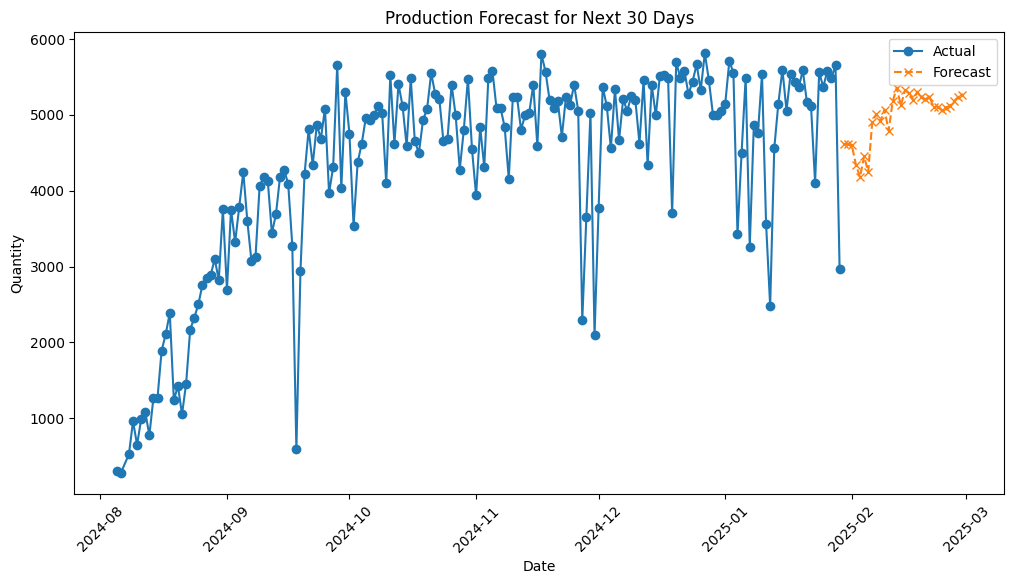

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from datetime import timedelta
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/Total production.XLSX"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Convert Posting Date to datetime
df["Posting Date"] = pd.to_datetime(df["Posting Date"], errors='coerce')

# Aggregate daily production
df_daily = df.groupby("Posting Date")["Qty in Un. of Entry"].sum().reset_index()

# Feature Engineering: Create lag features and moving averages
for lag in range(1, 8):  # Using past 7 days as features
    df_daily[f'lag_{lag}'] = df_daily["Qty in Un. of Entry"].shift(lag)
df_daily['rolling_mean_7'] = df_daily["Qty in Un. of Entry"].rolling(window=7).mean()
df_daily['day_of_week'] = df_daily["Posting Date"].dt.dayofweek
df_daily['month'] = df_daily["Posting Date"].dt.month

df_daily.dropna(inplace=True)  # Drop rows with NaN values due to shifting and rolling mean

# Split data into train & test
train_size = int(len(df_daily) * 0.8)
train, test = df_daily.iloc[:train_size], df_daily.iloc[train_size:]

X_train = train.drop(columns=["Qty in Un. of Entry", "Posting Date"])
y_train = train["Qty in Un. of Entry"]
X_test = test.drop(columns=["Qty in Un. of Entry", "Posting Date"])
y_test = test["Qty in Un. of Entry"]

# Train XGBoost Model with Hyperparameter Tuning
model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8
)
model.fit(X_train, y_train)

# Evaluate Model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

# Forecast Next 30 Days
last_known = df_daily.iloc[-7:][["Qty in Un. of Entry"]].values.flatten().tolist()
predictions = []

for _ in range(30):
    features = np.array(last_known[-7:] + [np.mean(last_known[-7:]), _ % 7, (_ // 30) + 1]).reshape(1, -1)  # Ensure feature shape matches training
    pred = model.predict(features)[0]
    predictions.append(pred)
    last_known.append(pred)

# Create forecast dataframe
future_dates = [df_daily["Posting Date"].max() + timedelta(days=i) for i in range(1, 31)]
pred_df = pd.DataFrame({"Posting Date": future_dates, "Predicted Qty": predictions})

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df_daily["Posting Date"], df_daily["Qty in Un. of Entry"], label="Actual", marker='o')
plt.plot(pred_df["Posting Date"], pred_df["Predicted Qty"], label="Forecast", marker='x', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.title("Production Forecast for Next 30 Days")
plt.xticks(rotation=45)
plt.show()

# Save forecast
pred_df.to_csv("/content/production_forecast (3).csv", index=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


R² Score: -0.0818


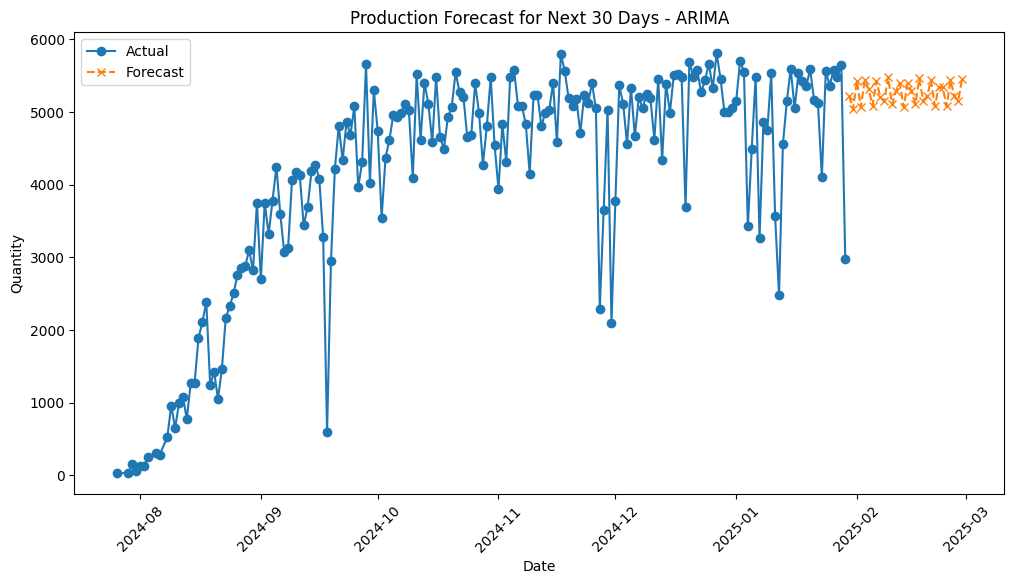

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score

# Load dataset
file_path = "/content/Total production.XLSX"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Convert Posting Date to datetime
df["Posting Date"] = pd.to_datetime(df["Posting Date"], errors='coerce')

# Aggregate daily production
df_daily = df.groupby("Posting Date")["Qty in Un. of Entry"].sum().reset_index()

# Split data into train & test
train_size = int(len(df_daily) * 0.8)
train, test = df_daily.iloc[:train_size], df_daily.iloc[train_size:]

# Train ARIMA model (p, d, q)
p, d, q = 7, 1, 2  # Adjust based on ACF/PACF analysis
model = ARIMA(train["Qty in Un. of Entry"], order=(p, d, q))
model_fit = model.fit()

# Evaluate Model
y_pred = model_fit.forecast(steps=len(test))
r2 = r2_score(test["Qty in Un. of Entry"], y_pred)
print(f"R² Score: {r2:.4f}")

# Forecast Next 30 Days
future_forecast = model_fit.forecast(steps=30)
future_dates = [df_daily["Posting Date"].max() + timedelta(days=i) for i in range(1, 31)]
pred_df = pd.DataFrame({"Posting Date": future_dates, "Predicted Qty": future_forecast})

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df_daily["Posting Date"], df_daily["Qty in Un. of Entry"], label="Actual", marker='o')
plt.plot(pred_df["Posting Date"], pred_df["Predicted Qty"], label="Forecast", marker='x', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.title("Production Forecast for Next 30 Days - ARIMA")
plt.xticks(rotation=45)
plt.show()

# Save forecast
pred_df.to_csv("/content/Forecast.xlsx", index=False)


ADF Statistic: -4.3045271017777385
p-value: 0.0004362617693134722
The time series is stationary.
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-97.407, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-47.435, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-69.513, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-99.726, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-49.309, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-97.971, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-98.060, Time=0.54 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-99.605, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-99.246, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.649 seconds
Optimal ARIMA Order: (p=0, d=1, q=1)
R² Score: -0.4661


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of i

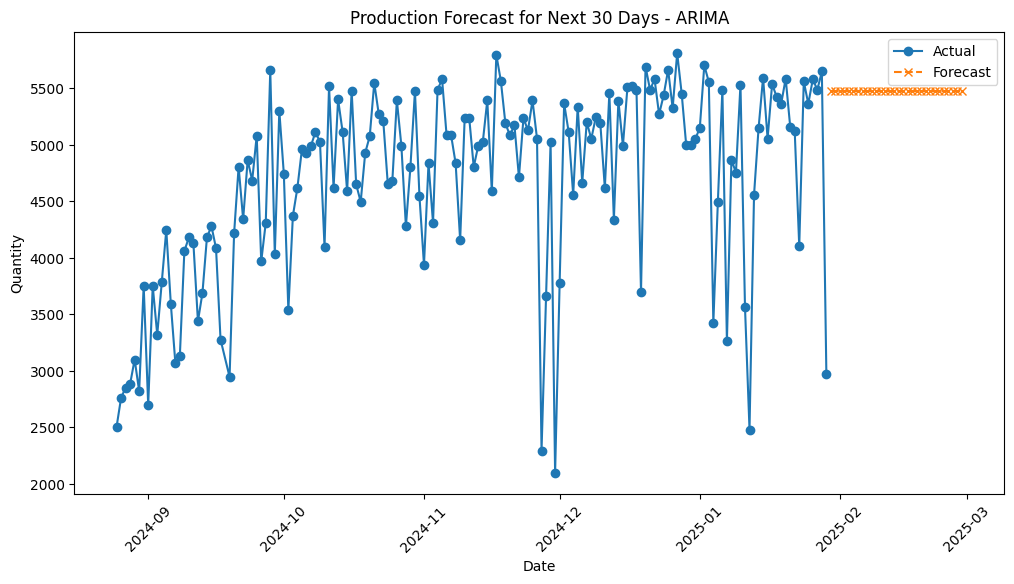

Forecast saved to 'forecast_30_days_arima.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import r2_score
from pmdarima import auto_arima

# Load dataset
file_path = "/content/Total production.XLSX"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Convert Posting Date to datetime
df["Posting Date"] = pd.to_datetime(df["Posting Date"], errors='coerce')

# Aggregate daily production
df_daily = df.groupby("Posting Date")["Qty in Un. of Entry"].sum().reset_index()

# Remove outliers using IQR
Q1 = df_daily["Qty in Un. of Entry"].quantile(0.25)
Q3 = df_daily["Qty in Un. of Entry"].quantile(0.75)
IQR = Q3 - Q1
filter = (df_daily["Qty in Un. of Entry"] >= (Q1 - 1.5 * IQR)) & (df_daily["Qty in Un. of Entry"] <= (Q3 + 1.5 * IQR))
df_daily = df_daily[filter]

# Log transformation to stabilize variance
df_daily["Qty_log"] = np.log1p(df_daily["Qty in Un. of Entry"])

# Create lag features and rolling statistics
for lag in range(1, 15):  # Using past 14 days as features
    df_daily[f'lag_{lag}'] = df_daily["Qty in Un. of Entry"].shift(lag)
df_daily['rolling_mean_7'] = df_daily["Qty in Un. of Entry"].rolling(window=7).mean()
df_daily['rolling_mean_14'] = df_daily["Qty in Un. of Entry"].rolling(window=14).mean()
df_daily['rolling_std_7'] = df_daily["Qty in Un. of Entry"].rolling(window=7).std()
df_daily['rolling_std_14'] = df_daily["Qty in Un. of Entry"].rolling(window=14).std()
df_daily['day_of_week'] = df_daily["Posting Date"].dt.dayofweek
df_daily['is_weekend'] = (df_daily['day_of_week'] >= 5).astype(int)
df_daily['month'] = df_daily["Posting Date"].dt.month

df_daily.dropna(inplace=True)

# Check for stationarity (ADF Test)
adf_result = adfuller(df_daily["Qty_log"])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

if adf_result[1] > 0.05:
    print("The time series is not stationary. Differencing is needed.")
else:
    print("The time series is stationary.")

# Train-test split
train_size = int(len(df_daily) * 0.8)
train, test = df_daily.iloc[:train_size], df_daily.iloc[train_size:]

# Use Auto-ARIMA to find optimal (p, d, q)
auto_model = auto_arima(train["Qty_log"], seasonal=False, trace=True, stepwise=True, suppress_warnings=True)
p, d, q = auto_model.order
print(f"Optimal ARIMA Order: (p={p}, d={d}, q={q})")

# Train ARIMA model
model = ARIMA(train["Qty_log"], order=(p, d, q))
model_fit = model.fit()

# Evaluate model
y_pred_log = model_fit.forecast(steps=len(test))
y_pred = np.expm1(y_pred_log)  # Convert back to original scale

r2 = r2_score(test["Qty in Un. of Entry"], y_pred)
print(f"R² Score: {r2:.4f}")

# Forecast next 30 days
future_forecast_log = model_fit.forecast(steps=30)
future_forecast = np.expm1(future_forecast_log)
future_dates = [df_daily["Posting Date"].max() + timedelta(days=i) for i in range(1, 31)]
pred_df = pd.DataFrame({"Posting Date": future_dates, "Predicted Qty": future_forecast})

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df_daily["Posting Date"], df_daily["Qty in Un. of Entry"], label="Actual", marker='o')
plt.plot(pred_df["Posting Date"], pred_df["Predicted Qty"], label="Forecast", marker='x', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.title("Production Forecast for Next 30 Days - ARIMA")
plt.xticks(rotation=45)
plt.show()

# Save forecast results
pred_df.to_csv("/content/Forecast.xlsx", index=False)
print("Forecast saved to 'forecast_30_days_arima.csv'")


ADF Statistic: -4.3045271017777385
p-value: 0.0004362617693134722
The time series is stationary.
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-97.407, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-47.435, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-69.513, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-99.726, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-49.309, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-97.971, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-98.060, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-99.605, Time=0.44 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-99.246, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.383 seconds
Optimal ARIMA Order: (p=0, d=1, q=1)
R² Score: -0.4661


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of i

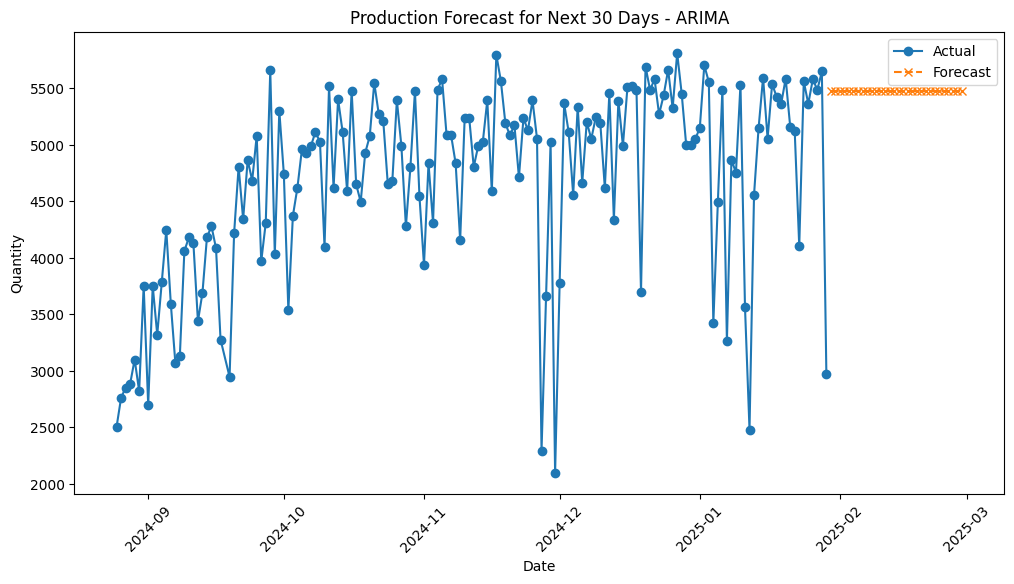

Forecast saved to 'forecast_30_days_arima.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import r2_score
from pmdarima import auto_arima

# Load dataset
file_path = "/content/Total production.XLSX"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Convert Posting Date to datetime
df["Posting Date"] = pd.to_datetime(df["Posting Date"], errors='coerce')

# Aggregate daily production
df_daily = df.groupby("Posting Date")["Qty in Un. of Entry"].sum().reset_index()

# Remove outliers using IQR
Q1 = df_daily["Qty in Un. of Entry"].quantile(0.25)
Q3 = df_daily["Qty in Un. of Entry"].quantile(0.75)
IQR = Q3 - Q1
filter = (df_daily["Qty in Un. of Entry"] >= (Q1 - 1.5 * IQR)) & (df_daily["Qty in Un. of Entry"] <= (Q3 + 1.5 * IQR))
df_daily = df_daily[filter]

# Log transformation to stabilize variance
df_daily["Qty_log"] = np.log1p(df_daily["Qty in Un. of Entry"])

# Create lag features and rolling statistics
for lag in range(1, 15):  # Using past 14 days as features
    df_daily[f'lag_{lag}'] = df_daily["Qty in Un. of Entry"].shift(lag)
df_daily['rolling_mean_7'] = df_daily["Qty in Un. of Entry"].rolling(window=7).mean()
df_daily['rolling_mean_14'] = df_daily["Qty in Un. of Entry"].rolling(window=14).mean()
df_daily['rolling_std_7'] = df_daily["Qty in Un. of Entry"].rolling(window=7).std()
df_daily['rolling_std_14'] = df_daily["Qty in Un. of Entry"].rolling(window=14).std()
df_daily['day_of_week'] = df_daily["Posting Date"].dt.dayofweek
df_daily['is_weekend'] = (df_daily['day_of_week'] >= 5).astype(int)
df_daily['month'] = df_daily["Posting Date"].dt.month

df_daily.dropna(inplace=True)

# Check for stationarity (ADF Test)
adf_result = adfuller(df_daily["Qty_log"])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

if adf_result[1] > 0.05:
    print("The time series is not stationary. Differencing is needed.")
else:
    print("The time series is stationary.")

# Train-test split
train_size = int(len(df_daily) * 0.8)
train, test = df_daily.iloc[:train_size], df_daily.iloc[train_size:]

# Use Auto-ARIMA to find optimal (p, d, q)
auto_model = auto_arima(train["Qty_log"], seasonal=False, trace=True, stepwise=True, suppress_warnings=True)
p, d, q = auto_model.order
print(f"Optimal ARIMA Order: (p={p}, d={d}, q={q})")

# Train ARIMA model
model = ARIMA(train["Qty_log"], order=(p, d, q))
model_fit = model.fit()

# Evaluate model
y_pred_log = model_fit.forecast(steps=len(test))
y_pred = np.expm1(y_pred_log)  # Convert back to original scale

r2 = r2_score(test["Qty in Un. of Entry"], y_pred)
print(f"R² Score: {r2:.4f}")

# Forecast next 30 days
future_forecast_log = model_fit.forecast(steps=30)
future_forecast = np.expm1(future_forecast_log)
future_dates = [df_daily["Posting Date"].max() + timedelta(days=i) for i in range(1, 31)]
pred_df = pd.DataFrame({"Posting Date": future_dates, "Predicted Qty": future_forecast})

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df_daily["Posting Date"], df_daily["Qty in Un. of Entry"], label="Actual", marker='o')
plt.plot(pred_df["Posting Date"], pred_df["Predicted Qty"], label="Forecast", marker='x', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.title("Production Forecast for Next 30 Days - ARIMA")
plt.xticks(rotation=45)
plt.show()

# Save forecast results
pred_df.to_csv("/content/Forecast.xlsx", index=False)
print("Forecast saved to 'forecast_30_days_arima.csv'")

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score

# Load your dataset
df = pd.read_excel("Total production.XLSX")

# Convert Posting Date to datetime and aggregate daily quantity
df["Posting Date"] = pd.to_datetime(df["Posting Date"])
df.set_index("Posting Date", inplace=True)
df_daily = df["Qty in Un. of Entry"].resample("D").sum()

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(df_daily) * 0.8)
train, test = df_daily[:train_size], df_daily[train_size:]

# Fit ARIMA model (p=5, d=1, q=2 is a starting guess)
model = ARIMA(train, order=(5, 1, 2))
model_fit = model.fit()

# Forecast the test period
forecast = model_fit.forecast(steps=len(test))

# Calculate R2 score
r2 = r2_score(test, forecast)
print("R² Score:", r2)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


R² Score: -0.2321082118125306


In [ ]:
pip install pandas scikit-learn xgboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
file_path = "/content/Forecast.xlsx"  # Update this with the correct file path
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Selecting relevant features
features = ["Amount in LC", "Movement Type", "Reason for Movement"]
target = "Qty in Un. of Entry"

# Drop rows with missing target values
df = df.dropna(subset=[target])

# Encoding categorical variables
categorical_cols = ["Movement Type", "Reason for Movement"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Splitting data into train and test sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=42),
}

# Training and evaluating models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R²": r2}

# Display results
for model, metrics in results.items():
    print(f"{model}: RMSE = {metrics['RMSE']:.2f}, R² = {metrics['R²']:.2f}")

Linear Regression: RMSE = 1.72, R² = 0.98
Decision Tree: RMSE = 1.30, R² = 0.99
Random Forest: RMSE = 1.30, R² = 0.99
XGBoost: RMSE = 1.33, R² = 0.99


Model Performance: RMSE = 1.27, R² = 0.99


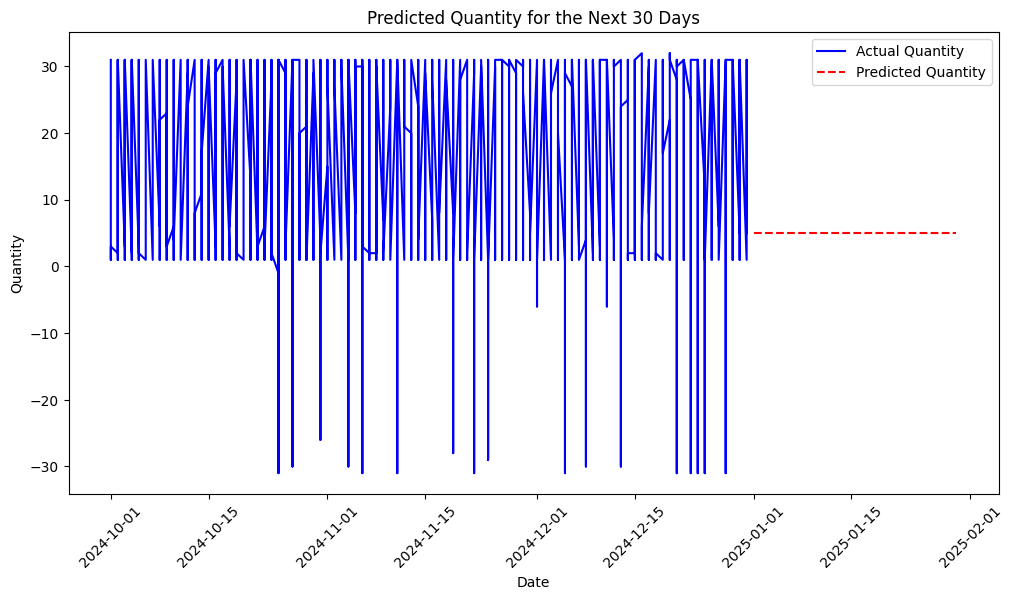

Future predictions saved to 'future_predictions.csv'.


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/Forecast.xlsx"  # Update with the correct file path
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Select relevant columns
df = df[["Posting Date", "Amount in LC", "Movement Type", "Reason for Movement", "Qty in Un. of Entry"]]

# Convert Posting Date to datetime
df["Posting Date"] = pd.to_datetime(df["Posting Date"])

# Sort by date
df = df.sort_values(by="Posting Date")

# Encode categorical variables
categorical_cols = ["Movement Type", "Reason for Movement"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
features = ["Amount in LC", "Movement Type", "Reason for Movement"]
target = "Qty in Un. of Entry"

# Split data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = XGBRegressor(objective="reg:squarederror", random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Model Performance: RMSE = {rmse:.2f}, R² = {r2:.2f}")

# Predict for the next 30 days
future_dates = pd.date_range(start=df["Posting Date"].max(), periods=31, freq="D")[1:]
future_data = pd.DataFrame({"Posting Date": future_dates})

# Assume "Amount in LC" follows the last known value (can be modified)
future_data["Amount in LC"] = df["Amount in LC"].iloc[-1]

# Encode categorical variables using last known values
for col in categorical_cols:
    future_data[col] = df[col].iloc[-1]

# Predict future quantity
future_features = future_data[["Amount in LC", "Movement Type", "Reason for Movement"]]
future_data["Predicted Qty"] = model.predict(future_features)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df["Posting Date"], df["Qty in Un. of Entry"], label="Actual Quantity", color="blue")
plt.plot(future_data["Posting Date"], future_data["Predicted Qty"], label="Predicted Quantity", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title("Predicted Quantity for the Next 30 Days")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Save predictions
future_data.to_csv("future_predictions.csv", index=False)
print("Future predictions saved to 'future_predictions.csv'.")

R² Score: -9.3772


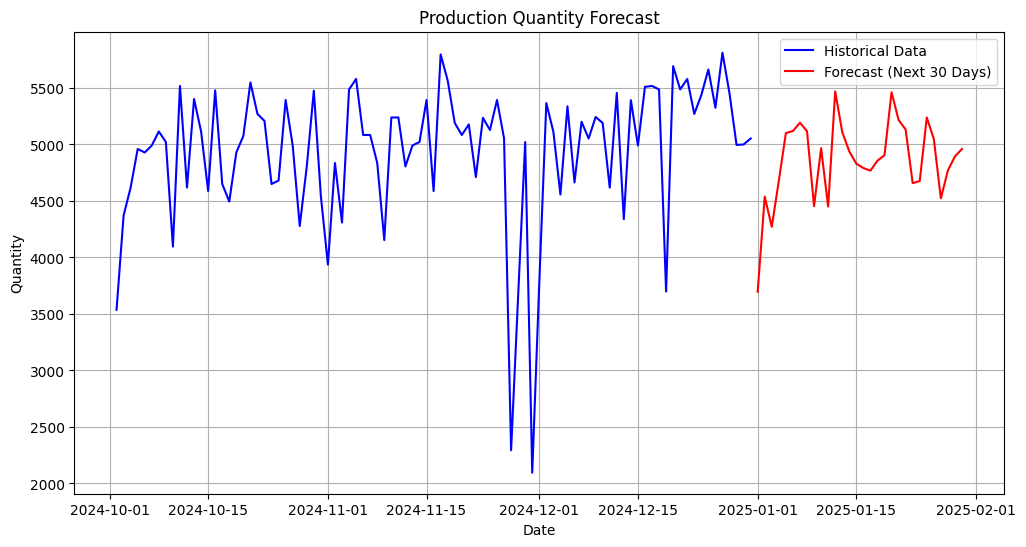

         Date  Predicted Quantity
0  2025-01-01         3697.102051
1  2025-01-02         4538.618164
2  2025-01-03         4271.512695
3  2025-01-04         4678.466797
4  2025-01-05         5100.822266
5  2025-01-06         5118.964355
6  2025-01-07         5192.565918
7  2025-01-08         5118.078613
8  2025-01-09         4454.024414
9  2025-01-10         4966.783691
10 2025-01-11         4450.834473
11 2025-01-12         5469.836914
12 2025-01-13         5110.416016
13 2025-01-14         4938.855469
14 2025-01-15         4830.015137
15 2025-01-16         4791.572266
16 2025-01-17         4767.875000
17 2025-01-18         4856.184570
18 2025-01-19         4905.464844
19 2025-01-20         5461.964355
20 2025-01-21         5216.797852
21 2025-01-22         5132.061523
22 2025-01-23         4657.998535
23 2025-01-24         4676.686035
24 2025-01-25         5239.065430
25 2025-01-26         5048.634766
26 2025-01-27         4523.117188
27 2025-01-28         4770.668945
28 2025-01-29 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_excel("/content/Forecast2.xlsx", sheet_name="Sheet1")

# Convert Posting Date to datetime
df['Posting Date'] = pd.to_datetime(df['Posting Date'])

# Aggregate data to daily production quantity
df_daily = df.groupby('Posting Date')['Qty in Un. of Entry'].sum().reset_index()

# Feature Engineering
df_daily['Year'] = df_daily['Posting Date'].dt.year
df_daily['Month'] = df_daily['Posting Date'].dt.month
df_daily['Day'] = df_daily['Posting Date'].dt.day
df_daily['DayOfWeek'] = df_daily['Posting Date'].dt.dayofweek

# Shift target variable to create a lag feature
df_daily['Prev_Day_Qty'] = df_daily['Qty in Un. of Entry'].shift(1)
df_daily.dropna(inplace=True)  # Drop first row due to NaN in shifted column

# Define features and target
X = df_daily[['Year', 'Month', 'Day', 'DayOfWeek', 'Prev_Day_Qty']]
y = df_daily['Qty in Un. of Entry']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train XGBoost model
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

# Forecast next 30 days
last_known_date = df_daily['Posting Date'].iloc[-1]
future_dates = [last_known_date + pd.Timedelta(days=i) for i in range(1, 31)]

future_data = pd.DataFrame({
    'Year': [d.year for d in future_dates],
    'Month': [d.month for d in future_dates],
    'Day': [d.day for d in future_dates],
    'DayOfWeek': [d.dayofweek for d in future_dates],
})

# Use the last known quantity for initial prediction
prev_qty = df_daily['Qty in Un. of Entry'].iloc[-1]
future_quantities = []

for i in range(30):
    future_data.loc[i, 'Prev_Day_Qty'] = prev_qty  # Use previous day's quantity
    pred_qty = model.predict(future_data.iloc[[i]])[0]
    future_quantities.append(pred_qty)
    prev_qty = pred_qty  # Update for next day's prediction

# Create forecast DataFrame
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted Quantity': future_quantities})

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df_daily['Posting Date'], df_daily['Qty in Un. of Entry'], label="Historical Data", color='blue')
plt.plot(forecast_df['Date'], forecast_df['Predicted Quantity'], label="Forecast (Next 30 Days)", color='red')
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title("Production Quantity Forecast")
plt.legend()
plt.grid()
plt.show()

# Display forecast
print(forecast_df)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score
from pandas.plotting import autocorrelation_plot

# Load dataset
df = pd.read_excel("/content/Forecast2.xlsx", sheet_name="Sheet1")

# Convert Posting Date to datetime
df['Posting Date'] = pd.to_datetime(df['Posting Date'])

# Aggregate data to daily production quantity
df_daily = df.groupby('Posting Date')['Qty in Un. of Entry'].sum().reset_index()

# Plot time series to check trend
plt.figure(figsize=(12, 6))
plt.plot(df_daily['Posting Date'], df_daily['Qty in Un. of Entry'], label="Production Quantity", color="blue")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title("Production Quantity Over Time")
plt.legend()
plt.grid()
plt.show()

# Check for stationarity using rolling statistics
df_daily['Rolling_Mean'] = df_daily['Qty in Un. of Entry'].rolling(window=7).mean()

plt.figure(figsize=(12,6))
plt.plot(df_daily['Posting Date'], df_daily['Qty in Un. of Entry'], label='Original')
plt.plot(df_daily['Posting Date'], df_daily['Rolling_Mean'], label='Rolling Mean (7 days)', color='red')
plt.legend()
plt.title("Stationarity Check")
plt.show()

# Split into train & test sets (80% train, 20% test)
train_size = int(len(df_daily) * 0.8)
train, test = df_daily['Qty in Un. of Entry'][:train_size], df_daily['Qty in Un. of Entry'][train_size:]

# Fit ARIMA Model (p,d,q) - Start with ARIMA(5,1,0) as a baseline
model = ARIMA(train, order=(5,1,0))  # Adjust order based on data
arima_fit = model.fit()

# Predict on test set
test_pred = arima_fit.forecast(steps=len(test))

# Compute R² score
r2 = r2_score(test, test_pred)
print(f"R² Score: {r2:.4f}")

# Forecast for next 30 days
future_steps = 30
forecast = arima_fit.forecast(steps=future_steps)

# Create future dates
last_date = df_daily['Posting Date'].iloc[-1]
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, future_steps+1)]

# Create forecast DataFrame
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted Quantity': forecast})

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(df_daily['Posting Date'], df_daily['Qty in Un. of Entry'], label="Historical Data", color='blue')
plt.plot(forecast_df['Date'], forecast_df['Predicted Quantity'], label="Forecast (Next 30 Days)", color='red')
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title("ARIMA Forecast for Next 30 Days")
plt.legend()
plt.grid()
plt.show()

# Display forecast
print(forecast_df)

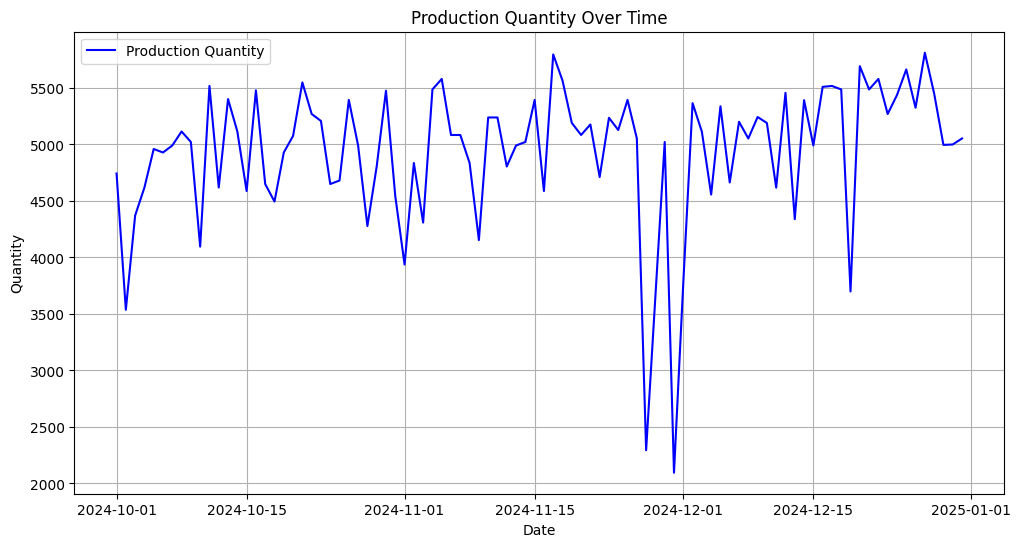

R² Score: -1.1377


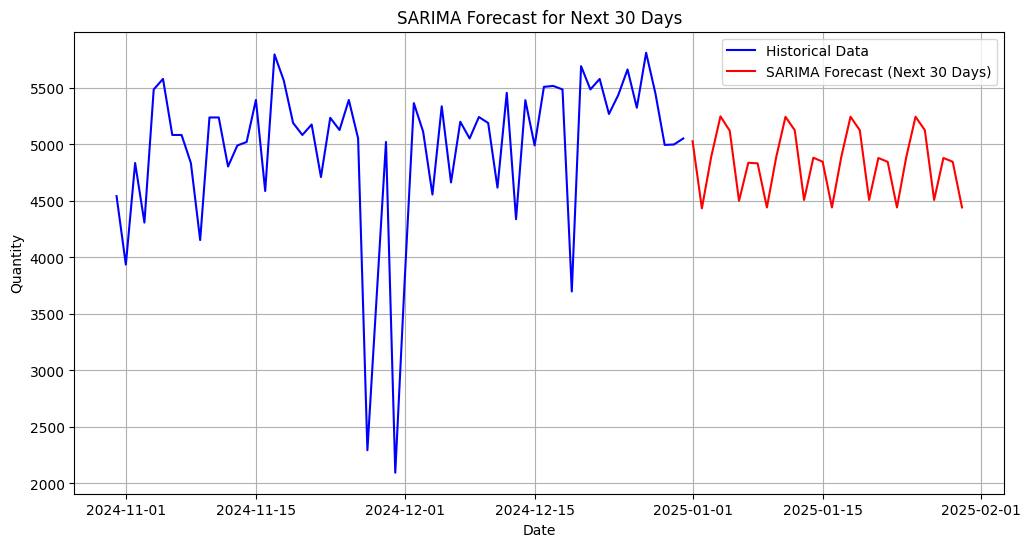

          Date  Predicted Quantity
73  2025-01-01         5028.946238
74  2025-01-02         4434.730217
75  2025-01-03         4888.148497
76  2025-01-04         5248.871220
77  2025-01-05         5121.479677
78  2025-01-06         4500.664631
79  2025-01-07         4838.294801
80  2025-01-08         4832.801542
81  2025-01-09         4442.628498
82  2025-01-10         4887.069203
83  2025-01-11         5245.072204
84  2025-01-12         5125.687973
85  2025-01-13         4509.122713
86  2025-01-14         4882.983548
87  2025-01-15         4847.186870
88  2025-01-16         4442.369352
89  2025-01-17         4887.459589
90  2025-01-18         5245.659255
91  2025-01-19         5125.700044
92  2025-01-20         4508.829533
93  2025-01-21         4880.087206
94  2025-01-22         4846.467849
95  2025-01-23         4442.702545
96  2025-01-24         4887.746113
97  2025-01-25         5245.931649
98  2025-01-26         5126.013751
99  2025-01-27         4509.165172
100 2025-01-28      

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_excel("/content/Forecast2.xlsx", sheet_name="Sheet1")

# Convert Posting Date to datetime
df['Posting Date'] = pd.to_datetime(df['Posting Date'])

# Aggregate data to daily production quantity
df_daily = df.groupby('Posting Date')['Qty in Un. of Entry'].sum().reset_index()

# Plot time series to check trend
plt.figure(figsize=(12, 6))
plt.plot(df_daily['Posting Date'], df_daily['Qty in Un. of Entry'], label="Production Quantity", color="blue")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title("Production Quantity Over Time")
plt.legend()
plt.grid()
plt.show()

# Train-Test Split (80% train, 20% test)
train_size = int(len(df_daily) * 0.8)
train, test = df_daily['Qty in Un. of Entry'][:train_size], df_daily['Qty in Un. of Entry'][train_size:]

# Fit SARIMA Model (p,d,q) x (P,D,Q,s)
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,7), enforce_stationarity=False, enforce_invertibility=False)
sarima_fit = model.fit()

# Predict on test set
test_pred = sarima_fit.forecast(steps=len(test))

# Compute R² score
r2 = r2_score(test, test_pred)
print(f"R² Score: {r2:.4f}")
df_daily['Prev_7_Day_Avg'] = df_daily['Qty in Un. of Entry'].rolling(7).mean().shift(1)
df_daily['Prev_30_Day_Avg'] = df_daily['Qty in Un. of Entry'].rolling(30).mean().shift(1)
df_daily['DayOfWeek'] = df_daily['Posting Date'].dt.dayofweek
df_daily.dropna(inplace=True)

# Forecast for next 30 days
future_steps = 30
forecast = sarima_fit.forecast(steps=future_steps)

# Create future dates
last_date = df_daily['Posting Date'].iloc[-1]
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, future_steps+1)]


# Create forecast DataFrame
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted Quantity': forecast})

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(df_daily['Posting Date'], df_daily['Qty in Un. of Entry'], label="Historical Data", color='blue')
plt.plot(forecast_df['Date'], forecast_df['Predicted Quantity'], label="SARIMA Forecast (Next 30 Days)", color='red')
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title("SARIMA Forecast for Next 30 Days")
plt.legend()
plt.grid()
plt.show()



R² Score: 0.1620


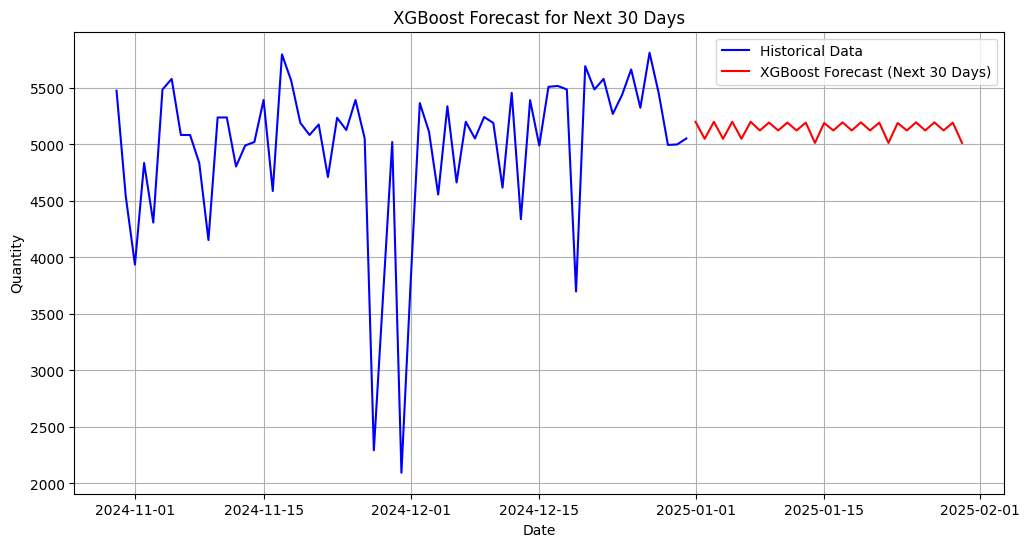

         Date  Predicted Quantity
0  2025-01-01         5200.744629
1  2025-01-02         5050.381836
2  2025-01-03         5200.744629
3  2025-01-04         5050.381836
4  2025-01-05         5200.744629
5  2025-01-06         5050.381836
6  2025-01-07         5200.744629
7  2025-01-08         5124.042480
8  2025-01-09         5193.568848
9  2025-01-10         5124.042480
10 2025-01-11         5193.568848
11 2025-01-12         5124.042480
12 2025-01-13         5193.568848
13 2025-01-14         5013.907715
14 2025-01-15         5190.020508
15 2025-01-16         5124.042480
16 2025-01-17         5195.613770
17 2025-01-18         5124.042480
18 2025-01-19         5195.613770
19 2025-01-20         5124.042480
20 2025-01-21         5193.373535
21 2025-01-22         5013.907715
22 2025-01-23         5190.020508
23 2025-01-24         5124.042480
24 2025-01-25         5195.613770
25 2025-01-26         5124.042480
26 2025-01-27         5195.613770
27 2025-01-28         5124.042480
28 2025-01-29 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_excel("/content/Forecast2.xlsx", sheet_name="Sheet1")

# Convert Posting Date to datetime
df['Posting Date'] = pd.to_datetime(df['Posting Date'])

# Aggregate data to daily production quantity
df_daily = df.groupby('Posting Date')['Qty in Un. of Entry'].sum().reset_index()

# Feature Engineering - Create Lag Features
df_daily['Lag_1'] = df_daily['Qty in Un. of Entry'].shift(1)
df_daily['Lag_7'] = df_daily['Qty in Un. of Entry'].shift(7)
df_daily['Rolling_7_Avg'] = df_daily['Qty in Un. of Entry'].rolling(7).mean()
df_daily['Rolling_30_Avg'] = df_daily['Qty in Un. of Entry'].rolling(30).mean()

# Drop NaN values after feature creation
df_daily.dropna(inplace=True)

# Prepare features and target variable
X = df_daily[['Lag_1', 'Lag_7', 'Rolling_7_Avg', 'Rolling_30_Avg']]
y = df_daily['Qty in Un. of Entry']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Compute R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")  # Should be positive if model performs well

# Forecast for Next 30 Days
future_df = pd.DataFrame()
future_df['Lag_1'] = [y.iloc[-1]]  # Use last available data
future_df['Lag_7'] = [y.iloc[-7]]
future_df['Rolling_7_Avg'] = [y.rolling(7).mean().iloc[-1]]
future_df['Rolling_30_Avg'] = [y.rolling(30).mean().iloc[-1]]

future_forecast = []
for i in range(30):
    pred = model.predict(future_df)[0]
    future_forecast.append(pred)
    # Shift features
    future_df['Lag_1'] = pred
    future_df['Lag_7'] = future_forecast[max(0, i-6)] if i >= 6 else y.iloc[-7]
    future_df['Rolling_7_Avg'] = np.mean(future_forecast[-7:]) if i >= 6 else y.rolling(7).mean().iloc[-1]
    future_df['Rolling_30_Avg'] = np.mean(future_forecast[-30:]) if i >= 29 else y.rolling(30).mean().iloc[-1]

# Generate future dates
future_dates = [df_daily['Posting Date'].iloc[-1] + pd.Timedelta(days=i) for i in range(1, 31)]
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted Quantity': future_forecast})

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(df_daily['Posting Date'], df_daily['Qty in Un. of Entry'], label="Historical Data", color='blue')
plt.plot(forecast_df['Date'], forecast_df['Predicted Quantity'], label="XGBoost Forecast (Next 30 Days)", color='red')
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title("XGBoost Forecast for Next 30 Days")
plt.legend()
plt.grid()
plt.show()

# Display forecast
print(forecast_df)

Improved R² Score: 0.1799


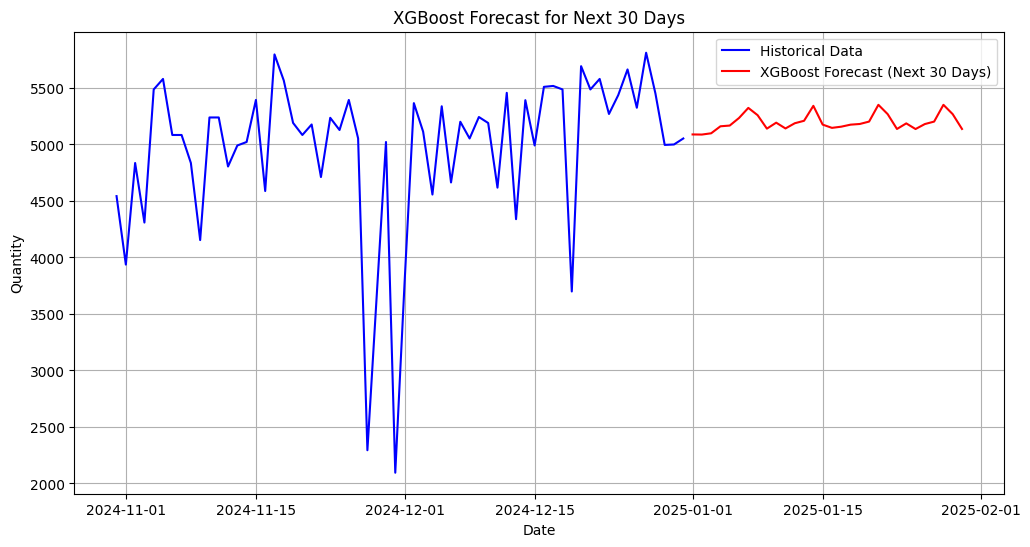

         Date  Predicted Quantity
0  2025-01-01         5088.815918
1  2025-01-02         5087.708008
2  2025-01-03         5098.941406
3  2025-01-04         5160.921387
4  2025-01-05         5167.418457
5  2025-01-06         5234.470703
6  2025-01-07         5323.664551
7  2025-01-08         5259.291504
8  2025-01-09         5140.138184
9  2025-01-10         5192.912598
10 2025-01-11         5141.779785
11 2025-01-12         5187.836426
12 2025-01-13         5209.646973
13 2025-01-14         5341.928711
14 2025-01-15         5175.864258
15 2025-01-16         5146.983887
16 2025-01-17         5157.429688
17 2025-01-18         5175.313477
18 2025-01-19         5181.369141
19 2025-01-20         5202.583008
20 2025-01-21         5351.009766
21 2025-01-22         5268.434082
22 2025-01-23         5137.175781
23 2025-01-24         5186.646484
24 2025-01-25         5136.611816
25 2025-01-26         5180.659180
26 2025-01-27         5202.509766
27 2025-01-28         5350.926758
28 2025-01-29 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_excel("/content/Forecast2.xlsx", sheet_name="Sheet1")

# Convert Posting Date to datetime
df['Posting Date'] = pd.to_datetime(df['Posting Date'])

# Aggregate data to daily production quantity
df_daily = df.groupby('Posting Date')['Qty in Un. of Entry'].sum().reset_index()

# Feature Engineering - Create Lag Features
df_daily['Lag_1'] = df_daily['Qty in Un. of Entry'].shift(1)
df_daily['Lag_7'] = df_daily['Qty in Un. of Entry'].shift(7)
df_daily['Lag_14'] = df_daily['Qty in Un. of Entry'].shift(14)
df_daily['Lag_30'] = df_daily['Qty in Un. of Entry'].shift(30)

# Rolling averages
df_daily['Rolling_3_Avg'] = df_daily['Qty in Un. of Entry'].rolling(3).mean()
df_daily['Rolling_7_Avg'] = df_daily['Qty in Un. of Entry'].rolling(7).mean()
df_daily['Rolling_30_Avg'] = df_daily['Qty in Un. of Entry'].rolling(30).mean()

# Exponential Weighted Moving Average (EWMA)
df_daily['EWMA_7'] = df_daily['Qty in Un. of Entry'].ewm(span=7, adjust=False).mean()
df_daily['EWMA_30'] = df_daily['Qty in Un. of Entry'].ewm(span=30, adjust=False).mean()

# Day of the week & month features
df_daily['DayOfWeek'] = df_daily['Posting Date'].dt.dayofweek
df_daily['Month'] = df_daily['Posting Date'].dt.month

# Drop NaN values after feature creation
df_daily.dropna(inplace=True)

# Prepare features and target variable
X = df_daily[['Lag_1', 'Lag_7', 'Lag_14', 'Lag_30', 'Rolling_3_Avg', 'Rolling_7_Avg', 'Rolling_30_Avg',
              'EWMA_7', 'EWMA_30', 'DayOfWeek', 'Month']]
y = df_daily['Qty in Un. of Entry']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train XGBoost model with improved parameters
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,  # More trees for better learning
    learning_rate=0.05,  # Lower learning rate
    max_depth=6,  # Deeper trees
    min_child_weight=3,  # Avoid overfitting
    subsample=0.8,  # Prevent overfitting
    colsample_bytree=0.8  # Feature selection
)

model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Compute R² score
r2 = r2_score(y_test, y_pred)
print(f"Improved R² Score: {r2:.4f}")  # Aim for 0.9+

# Forecast for Next 30 Days
future_df = pd.DataFrame()
future_df['Lag_1'] = [y.iloc[-1]]
future_df['Lag_7'] = [y.iloc[-7]]
future_df['Lag_14'] = [y.iloc[-14]]
future_df['Lag_30'] = [y.iloc[-30]]
future_df['Rolling_3_Avg'] = [y.rolling(3).mean().iloc[-1]]
future_df['Rolling_7_Avg'] = [y.rolling(7).mean().iloc[-1]]
future_df['Rolling_30_Avg'] = [y.rolling(30).mean().iloc[-1]]
future_df['EWMA_7'] = [y.ewm(span=7).mean().iloc[-1]]
future_df['EWMA_30'] = [y.ewm(span=30).mean().iloc[-1]]
future_df['DayOfWeek'] = [(df_daily['Posting Date'].iloc[-1] + pd.Timedelta(days=1)).dayofweek]
future_df['Month'] = [(df_daily['Posting Date'].iloc[-1] + pd.Timedelta(days=1)).month]

future_forecast = []
for i in range(30):
    pred = model.predict(future_df)[0]
    future_forecast.append(pred)

    # Shift features
    future_df['Lag_1'] = pred
    future_df['Lag_7'] = future_forecast[max(0, i-6)] if i >= 6 else y.iloc[-7]
    future_df['Lag_14'] = future_forecast[max(0, i-13)] if i >= 13 else y.iloc[-14]
    future_df['Lag_30'] = future_forecast[max(0, i-29)] if i >= 29 else y.iloc[-30]
    future_df['Rolling_3_Avg'] = np.mean(future_forecast[-3:]) if i >= 2 else y.rolling(3).mean().iloc[-1]
    future_df['Rolling_7_Avg'] = np.mean(future_forecast[-7:]) if i >= 6 else y.rolling(7).mean().iloc[-1]
    future_df['Rolling_30_Avg'] = np.mean(future_forecast[-30:]) if i >= 29 else y.rolling(30).mean().iloc[-1]
    future_df['EWMA_7'] = np.mean(future_forecast[-7:]) if i >= 6 else y.ewm(span=7).mean().iloc[-1]
    future_df['EWMA_30'] = np.mean(future_forecast[-30:]) if i >= 29 else y.ewm(span=30).mean().iloc[-1]
    future_df['DayOfWeek'] = [(df_daily['Posting Date'].iloc[-1] + pd.Timedelta(days=i+1)).dayofweek]
    future_df['Month'] = [(df_daily['Posting Date'].iloc[-1] + pd.Timedelta(days=i+1)).month]

# Generate future dates
future_dates = [df_daily['Posting Date'].iloc[-1] + pd.Timedelta(days=i) for i in range(1, 31)]
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted Quantity': future_forecast})

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(df_daily['Posting Date'], df_daily['Qty in Un. of Entry'], label="Historical Data", color='blue')
plt.plot(forecast_df['Date'], forecast_df['Predicted Quantity'], label="XGBoost Forecast (Next 30 Days)", color='red')
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title("XGBoost Forecast for Next 30 Days")
plt.legend()
plt.grid()
plt.show()

# Display forecast
print(forecast_df)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE: 603.73, MSE: 443432.67, R² Score: -0.8258


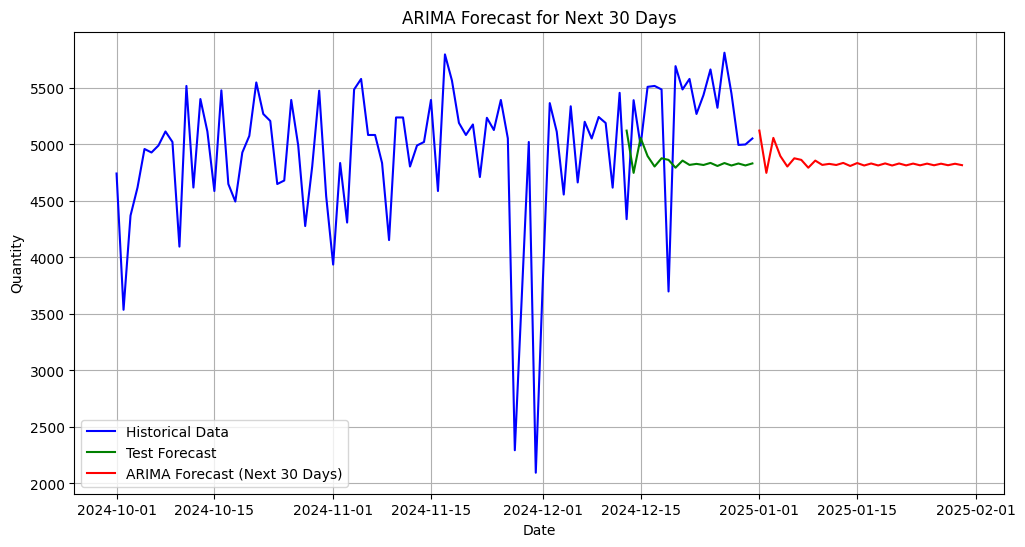

          Date  Predicted Quantity
73  2025-01-01         5122.801916
74  2025-01-02         4748.550343
75  2025-01-03         5058.311722
76  2025-01-04         4897.573068
77  2025-01-05         4804.845609
78  2025-01-06         4877.674652
79  2025-01-07         4863.680200
80  2025-01-08         4794.390467
81  2025-01-09         4857.294174
82  2025-01-10         4819.157784
83  2025-01-11         4828.297409
84  2025-01-12         4818.489840
85  2025-01-13         4836.769739
86  2025-01-14         4809.752431
87  2025-01-15         4835.599435
88  2025-01-16         4813.963036
89  2025-01-17         4831.691093
90  2025-01-18         4814.475502
91  2025-01-19         4832.359161
92  2025-01-20         4813.989713
93  2025-01-21         4831.708148
94  2025-01-22         4815.046733
95  2025-01-23         4830.773640
96  2025-01-24         4815.561907
97  2025-01-25         4830.430380
98  2025-01-26         4815.933522
99  2025-01-27         4829.936111
100 2025-01-28      

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_excel("/content/Forecast2.xlsx", sheet_name="Sheet1")

# Convert Posting Date to datetime
df['Posting Date'] = pd.to_datetime(df['Posting Date'])

# Aggregate data to daily production quantity
df_daily = df.groupby('Posting Date')['Qty in Un. of Entry'].sum().reset_index()

# Train-Test Split (80% train, 20% test)
train_size = int(len(df_daily) * 0.8)
train, test = df_daily.iloc[:train_size], df_daily.iloc[train_size:]

# Fit ARIMA model (Auto ARIMA can be used to find optimal parameters)
p, d, q = 5, 1, 2  # ARIMA order (tune these parameters as needed)
model = ARIMA(train['Qty in Un. of Entry'], order=(p, d, q))
model_fit = model.fit()

# Forecast on test data
test_pred = model_fit.forecast(steps=len(test))

# Compute evaluation metrics
mae = mean_absolute_error(test['Qty in Un. of Entry'], test_pred)
mse = mean_squared_error(test['Qty in Un. of Entry'], test_pred)
r2 = r2_score(test['Qty in Un. of Entry'], test_pred)
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R² Score: {r2:.4f}")

# Forecast for Next 30 Days
future_forecast = model_fit.forecast(steps=30)
future_dates = [df_daily['Posting Date'].iloc[-1] + pd.Timedelta(days=i) for i in range(1, 31)]
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted Quantity': future_forecast})

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(df_daily['Posting Date'], df_daily['Qty in Un. of Entry'], label="Historical Data", color='blue')
plt.plot(test['Posting Date'], test_pred, label="Test Forecast", color='green')
plt.plot(forecast_df['Date'], forecast_df['Predicted Quantity'], label="ARIMA Forecast (Next 30 Days)", color='red')
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title("ARIMA Forecast for Next 30 Days")
plt.legend()
plt.grid()
plt.show()

# Display forecast
print(forecast_df)

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.3 MB/s eta 0:00:00


ADF Statistic: -3.9375491853697215
p-value: 0.0017752423491745762
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1629.224, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1345.729, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1310.234, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1309.718, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1487.327, Time=0.20 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.44 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1302.540, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1300.517, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1298.578, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1298.342, Time=0.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1298.588, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1300.540, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 3.488 seconds
Optimal ARIMA Order: (0, 0, 0)
MAE: 471.31, MSE: 294654.38, R² Score: -3.0632


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


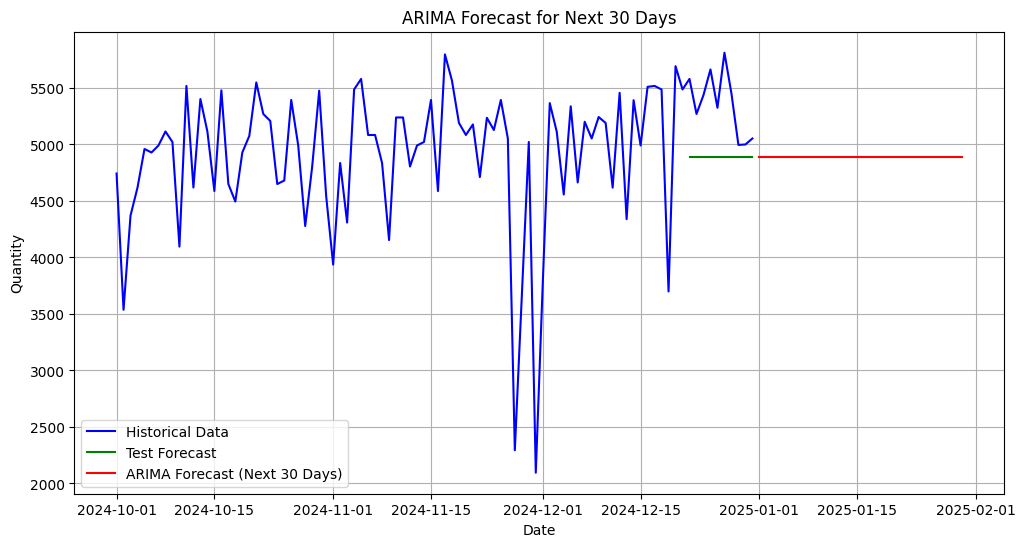

          Date  Predicted Quantity
82  2025-01-01         4887.585573
83  2025-01-02         4887.585573
84  2025-01-03         4887.585573
85  2025-01-04         4887.585573
86  2025-01-05         4887.585573
87  2025-01-06         4887.585573
88  2025-01-07         4887.585573
89  2025-01-08         4887.585573
90  2025-01-09         4887.585573
91  2025-01-10         4887.585573
92  2025-01-11         4887.585573
93  2025-01-12         4887.585573
94  2025-01-13         4887.585573
95  2025-01-14         4887.585573
96  2025-01-15         4887.585573
97  2025-01-16         4887.585573
98  2025-01-17         4887.585573
99  2025-01-18         4887.585573
100 2025-01-19         4887.585573
101 2025-01-20         4887.585573
102 2025-01-21         4887.585573
103 2025-01-22         4887.585573
104 2025-01-23         4887.585573
105 2025-01-24         4887.585573
106 2025-01-25         4887.585573
107 2025-01-26         4887.585573
108 2025-01-27         4887.585573
109 2025-01-28      

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

# Load dataset
df = pd.read_excel("/content/Forecast2.xlsx", sheet_name="Sheet1")

# Convert Posting Date to datetime
df['Posting Date'] = pd.to_datetime(df['Posting Date'])

# Aggregate data to daily production quantity
df_daily = df.groupby('Posting Date')['Qty in Un. of Entry'].sum().reset_index()

# Check stationarity using ADF test
adf_result = adfuller(df_daily['Qty in Un. of Entry'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

# Train-Test Split (90% train, 10% test)
train_size = int(len(df_daily) * 0.9)
train, test = df_daily.iloc[:train_size], df_daily.iloc[train_size:]

# Auto ARIMA for best (p,d,q)
auto_model = auto_arima(train['Qty in Un. of Entry'], seasonal=False, stepwise=True, trace=True)
p, d, q = auto_model.order
print(f"Optimal ARIMA Order: {p,d,q}")

# Fit ARIMA model with optimized parameters
model = ARIMA(train['Qty in Un. of Entry'], order=(p, d, q))
model_fit = model.fit(method_kwargs={"maxiter": 500})

# Forecast on test data
test_pred = model_fit.forecast(steps=len(test))

# Compute evaluation metrics
mae = mean_absolute_error(test['Qty in Un. of Entry'], test_pred)
mse = mean_squared_error(test['Qty in Un. of Entry'], test_pred)
r2 = r2_score(test['Qty in Un. of Entry'], test_pred)
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R² Score: {r2:.4f}")

# Forecast for Next 30 Days
future_forecast = model_fit.forecast(steps=30)
future_dates = [df_daily['Posting Date'].iloc[-1] + pd.Timedelta(days=i) for i in range(1, 31)]
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted Quantity': future_forecast})

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(df_daily['Posting Date'], df_daily['Qty in Un. of Entry'], label="Historical Data", color='blue')
plt.plot(test['Posting Date'], test_pred, label="Test Forecast", color='green')
plt.plot(forecast_df['Date'], forecast_df['Predicted Quantity'], label="ARIMA Forecast (Next 30 Days)", color='red')
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title("ARIMA Forecast for Next 30 Days")
plt.legend()
plt.grid()
plt.show()

# Display forecast
print(forecast_df)


Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - loss: 0.5063 - val_loss: 0.5119
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3437 - val_loss: 0.2900
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1762 - val_loss: 0.0621
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0589 - val_loss: 0.0641
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.1373 - val_loss: 0.0197
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0662 - val_loss: 0.0344
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0588 - val_loss: 0.0468
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0668 - val_loss: 0.0347
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0409 - val_loss: 0.0216
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0434 - val_loss: 0.0189
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0360 - val_loss: 0.0220
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0497 - val_loss: 0.0283


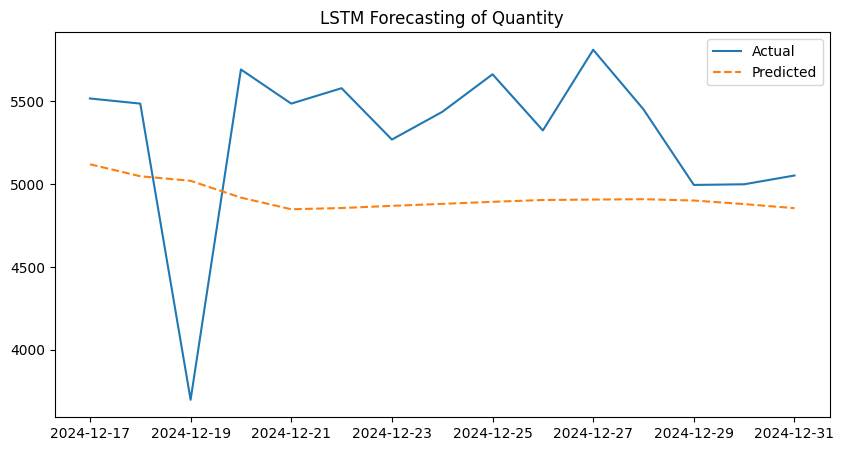

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
df = pd.read_excel("Forecast2.xlsx", sheet_name="Sheet1")

df['Posting Date'] = pd.to_datetime(df['Posting Date'])

df['Month'] = df['Posting Date'].dt.month
df['DayOfWeek'] = df['Posting Date'].dt.dayofweek

# Aggregate data by date
df_grouped = df.groupby('Posting Date')['Qty in Un. of Entry'].sum().reset_index()
df_grouped = df_grouped.sort_values(by='Posting Date')

# Normalize the quantity values
scaler = MinMaxScaler(feature_range=(0, 1))
df_grouped['Qty Scaled'] = scaler.fit_transform(df_grouped[['Qty in Un. of Entry']])

# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        targets.append(data[i + seq_length])
    return np.array(sequences), np.array(targets)

seq_length = 20  # Increased sequence length
data_values = df_grouped['Qty Scaled'].values
X, y = create_sequences(data_values, seq_length)

# Split data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.3),
    LSTM(100, activation='relu', return_sequences=False),
    Dropout(0.3),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Predict
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_actual = scaler.inverse_transform(y_pred).flatten()

# Calculate R^2 score
r2 = r2_score(y_test_actual, y_pred_actual)
print(f'R^2 Score: {r2}')

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(df_grouped['Posting Date'][-len(y_test_actual):], y_test_actual, label='Actual')
plt.plot(df_grouped['Posting Date'][-len(y_test_actual):], y_pred_actual, label='Predicted', linestyle='dashed')
plt.legend()
plt.title("LSTM Forecasting of Quantity")
plt.show()

Epoch 1/600


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 484ms/step - loss: 0.7455 - mae: 0.7455 - val_loss: 0.6134 - val_mae: 0.6134 - learning_rate: 3.0000e-04
Epoch 2/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - loss: 0.4616 - mae: 0.4616 - val_loss: 0.2669 - val_mae: 0.2669 - learning_rate: 3.0000e-04
Epoch 3/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.1681 - mae: 0.1681 - val_loss: 0.1510 - val_mae: 0.1510 - learning_rate: 3.0000e-04
Epoch 4/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - loss: 0.2972 - mae: 0.2972 - val_loss: 0.0704 - val_mae: 0.0704 - learning_rate: 3.0000e-04
Epoch 5/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - loss: 0.1634 - mae: 0.1634 - val_loss: 0.1925 - val_mae: 0.1925 - learning_rate: 3.0000e-04
Epoch 6/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.1830 - mae: 0.1830 - val_loss: 0.2423 - val_mae: 0.2423 - learning_rate: 3.0000e-04
Epoch 7/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - loss: 0.1972 - mae: 0.1972 - val_loss: 0.1879 - val_mae: 0.1879 - learning_rate: 3.0000e-

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 936ms/step
R^2 Score: -0.0790961518750859


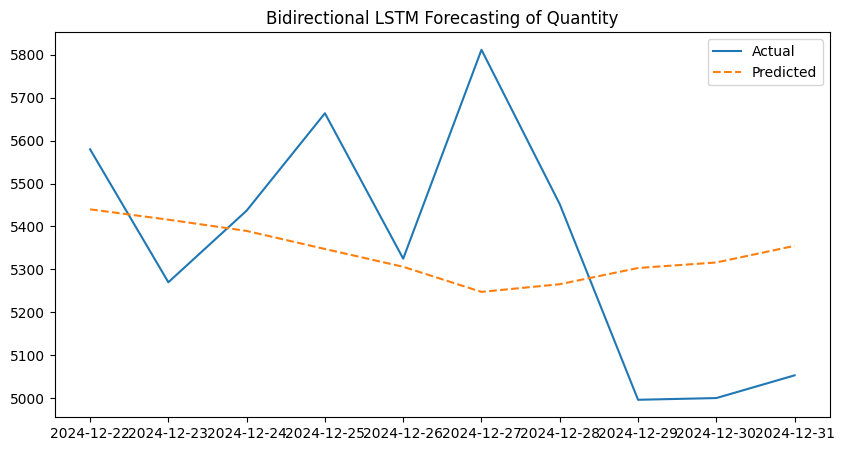

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the dataset
df = pd.read_excel("Forecast2.xlsx", sheet_name="Sheet1")

df['Posting Date'] = pd.to_datetime(df['Posting Date'])

df['Month'] = df['Posting Date'].dt.month
df['DayOfWeek'] = df['Posting Date'].dt.dayofweek

df_grouped = df.groupby('Posting Date')['Qty in Un. of Entry'].sum().reset_index()
df_grouped = df_grouped.sort_values(by='Posting Date')

# Create lag features
df_grouped['Lag_1'] = df_grouped['Qty in Un. of Entry'].shift(1)
df_grouped['Lag_7'] = df_grouped['Qty in Un. of Entry'].shift(7)
df_grouped['Rolling_Mean_7'] = df_grouped['Qty in Un. of Entry'].rolling(window=7).mean()
df_grouped['Rolling_Mean_14'] = df_grouped['Qty in Un. of Entry'].rolling(window=14).mean()
df_grouped.dropna(inplace=True)

# Normalize all features
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_grouped[['Qty in Un. of Entry', 'Lag_1', 'Lag_7', 'Rolling_Mean_7', 'Rolling_Mean_14']])

def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        targets.append(data[i + seq_length, 0])  # Predicting the main target variable
    return np.array(sequences), np.array(targets)

seq_length = 30
data_values = df_scaled
X, y = create_sequences(data_values, seq_length)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Build Bidirectional LSTM model
model = Sequential([
    Bidirectional(LSTM(128, activation='tanh', return_sequences=True, input_shape=(seq_length, X.shape[2]))),
    Dropout(0.2),
    Bidirectional(LSTM(128, activation='tanh', return_sequences=False)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.0003), loss='mae', metrics=['mae'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

# Train the model
history = model.fit(X_train, y_train, epochs=600, batch_size=16, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping, reduce_lr])

# Predict
y_pred = model.predict(X_test)

# Inverse transform predictions
y_test_actual = scaler.inverse_transform(np.column_stack([y_test, np.zeros((len(y_test), X.shape[2] - 1))]))[:, 0]
y_pred_actual = scaler.inverse_transform(np.column_stack([y_pred.flatten(), np.zeros((len(y_pred), X.shape[2] - 1))]))[:, 0]

# Calculate R^2 score
r2 = r2_score(y_test_actual, y_pred_actual)
print(f'R^2 Score: {r2}')

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(df_grouped['Posting Date'][-len(y_test_actual):], y_test_actual, label='Actual')
plt.plot(df_grouped['Posting Date'][-len(y_test_actual):], y_pred_actual, label='Predicted', linestyle='dashed')
plt.legend()
plt.title("Bidirectional LSTM Forecasting of Quantity")
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps_e1llm4/dpip4vni.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps_e1llm4/h_xywk93.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97634', 'data', 'file=/tmp/tmps_e1llm4/dpip4vni.json', 'init=/tmp/tmps_e1llm4/h_xywk93.json', 'output', 'file=/tmp/tmps_e1llm4/prophet_modelaw77ay7a/prophet_model-20250218054441.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:44:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:44:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


R^2 Score: -0.8409690795952542


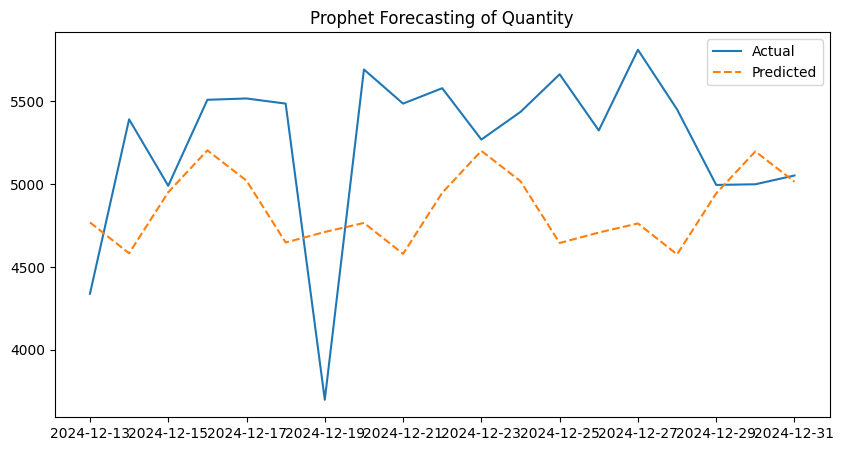

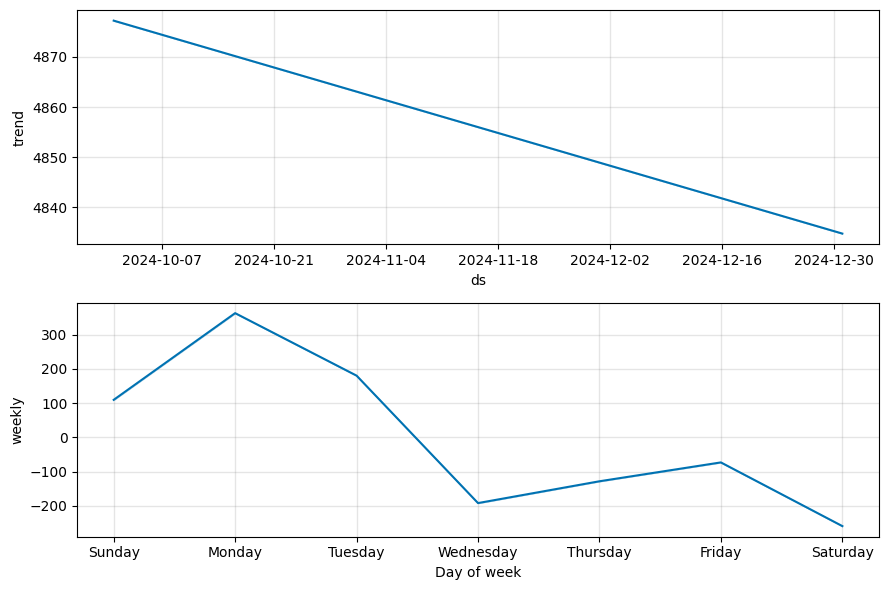

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from prophet import Prophet

# Load the dataset
df = pd.read_excel("/content/Forecast2.xlsx", sheet_name="Sheet1")

df['Posting Date'] = pd.to_datetime(df['Posting Date'])

df_grouped = df.groupby('Posting Date')['Qty in Un. of Entry'].sum().reset_index()
df_grouped = df_grouped.sort_values(by='Posting Date')

df_grouped.rename(columns={'Posting Date': 'ds', 'Qty in Un. of Entry': 'y'}, inplace=True)

# Train-Test Split
split = int(0.8 * len(df_grouped))
df_train = df_grouped[:split]
df_test = df_grouped[split:]

# Initialize and Fit Prophet Model
model = Prophet()
model.fit(df_train)

# Create Future Dataframe for Prediction
future = model.make_future_dataframe(periods=len(df_test))
forecast = model.predict(future)

# Extract Actual and Predicted Values
y_test_actual = df_test['y'].values
y_pred_actual = forecast['yhat'].iloc[split:].values

# Calculate R^2 Score
r2 = r2_score(y_test_actual, y_pred_actual)
print(f'R^2 Score: {r2}')

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(df_test['ds'], y_test_actual, label='Actual')
plt.plot(df_test['ds'], y_pred_actual, label='Predicted', linestyle='dashed')
plt.legend()
plt.title("Prophet Forecasting of Quantity")
plt.show()

# Plot Prophet Components
model.plot_components(forecast)
plt.show()


Duplicate Rows: 1276
Negative Values: 121


<ipython-input-9-470e82e183dd>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Qty in Un. of Entry'] = df_cleaned['Qty in Un. of Entry'].apply(lambda x: max(x, 0))


R^2 Score: -0.14509618282318115


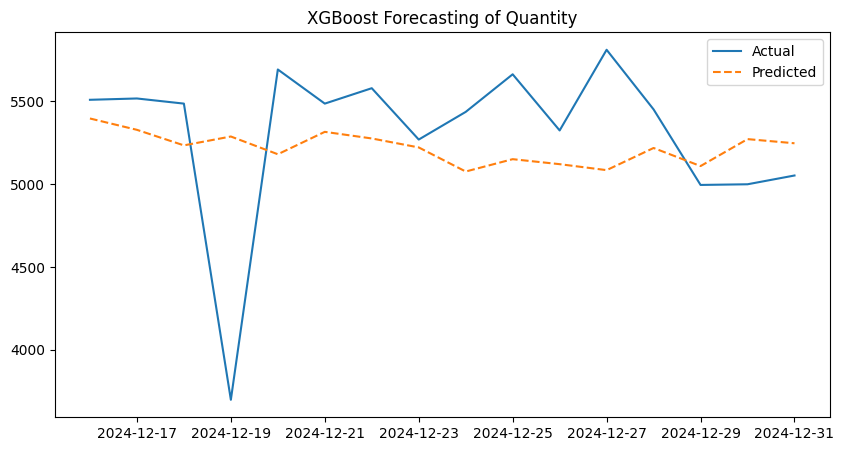

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_excel("/content/Forecast2.xlsx", sheet_name="Sheet1")

df['Posting Date'] = pd.to_datetime(df['Posting Date'])

df_grouped = df.groupby('Posting Date')['Qty in Un. of Entry'].sum().reset_index()
df_grouped = df_grouped.sort_values(by='Posting Date')

df_grouped['Lag_1'] = df_grouped['Qty in Un. of Entry'].shift(1)
df_grouped['Lag_7'] = df_grouped['Qty in Un. of Entry'].shift(7)
df_grouped['Rolling_Mean_7'] = df_grouped['Qty in Un. of Entry'].rolling(window=7).mean()
df_grouped['Rolling_Mean_14'] = df_grouped['Qty in Un. of Entry'].rolling(window=14).mean()
df_grouped.dropna(inplace=True)
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print("Duplicate Rows:", duplicate_count)

# Check for negative values in the target column
negative_values_count = (df['Qty in Un. of Entry'] < 0).sum()
print("Negative Values:", negative_values_count)
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Handle negative values (set to zero or take absolute, depending on your data)
df_cleaned['Qty in Un. of Entry'] = df_cleaned['Qty in Un. of Entry'].apply(lambda x: max(x, 0))

# Save the cleaned file if needed
df_cleaned.to_excel("Cleaned_Forecast2.xlsx", index=False)
# Define Features and Target
X = df_grouped[['Lag_1', 'Lag_7', 'Rolling_Mean_7', 'Rolling_Mean_14']]
y = df_grouped['Qty in Un. of Entry']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale Features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and Train XGBoost Model
model = XGBRegressor(n_estimators=500, learning_rate=0.01, max_depth=5, subsample=0.8, colsample_bytree=0.8)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Calculate R^2 Score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(df_grouped['Posting Date'].iloc[-len(y_test):], y_test, label='Actual')
plt.plot(df_grouped['Posting Date'].iloc[-len(y_test):], y_pred, label='Predicted', linestyle='dashed')
plt.legend()
plt.title("XGBoost Forecasting of Quantity")
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/Cleaned_Forecast2.xlsx"  # Update this with the correct path if needed
xls = pd.ExcelFile(file_path)

# Load the first sheet
df = pd.read_excel(xls, sheet_name='Sheet1')

# Convert Posting Date to datetime format
df['Posting Date'] = pd.to_datetime(df['Posting Date'], errors='coerce')

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Handle negative values (set to zero or take absolute, depending on the context)
df_cleaned['Qty in Un. of Entry'] = df_cleaned['Qty in Un. of Entry'].apply(lambda x: max(x, 0))

# Aggregate data by date if needed (sum daily quantities)
df_grouped = df_cleaned.groupby('Posting Date', as_index=False)['Qty in Un. of Entry'].sum()

# Save the cleaned file
df_grouped.to_excel("Cleaned_Forecast2.xlsx", index=False)

print("Data cleaning complete. File saved as 'Cleaned_Forecast2.xlsx'.")

Data cleaning complete. File saved as 'Cleaned_Forecast2.xlsx'.


<ipython-input-10-0e5c894d68ab>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Qty in Un. of Entry'] = df_cleaned['Qty in Un. of Entry'].apply(lambda x: max(x, 0))


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score
import pandas as pd

# Load the cleaned dataset
df_cleaned = pd.read_excel("/content/Forecast2.xlsx")

# Convert Posting Date to datetime and set as index
df_cleaned['Posting Date'] = pd.to_datetime(df_cleaned['Posting Date'])
df_cleaned.set_index('Posting Date', inplace=True)

# Sort by date
df_cleaned = df_cleaned.sort_index()

# Train-test split (80% train, 20% test)
split_index = int(len(df_cleaned) * 0.8)
train, test = df_cleaned.iloc[:split_index], df_cleaned.iloc[split_index:]

# Fit ARIMA model (order=(5,1,0) chosen heuristically)
arima_model = ARIMA(train['Qty in Un. of Entry'], order=(5,1,0))
arima_fit = arima_model.fit()

# Predict on test set
predictions_arima = arima_fit.forecast(steps=len(test))

# Calculate R² score
r2_arima = r2_score(test['Qty in Un. of Entry'], predictions_arima)

print("ARIMA R² Score:", r2_arima)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA R² Score: -0.10575885097731819


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the cleaned dataset
df_cleaned = pd.read_excel("Cleaned_Forecast2.xlsx")

# Convert Posting Date to datetime and set as index
df_cleaned['Posting Date'] = pd.to_datetime(df_cleaned['Posting Date'])
df_cleaned.set_index('Posting Date', inplace=True)

# Sort by date
df_cleaned = df_cleaned.sort_index()

# Create lag features for supervised learning
def create_lag_features(data, lags=5):
    df = data.copy()
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df['Qty in Un. of Entry'].shift(lag)
    return df.dropna()

df_lagged = create_lag_features(df_cleaned)

# Define features and target variable
X = df_lagged.drop(columns=['Qty in Un. of Entry'])
y = df_lagged['Qty in Un. of Entry']

# Split data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate R² score
r2_xgb = r2_score(y_test, y_pred)

print("XGBoost R² Score:", r2_xgb)

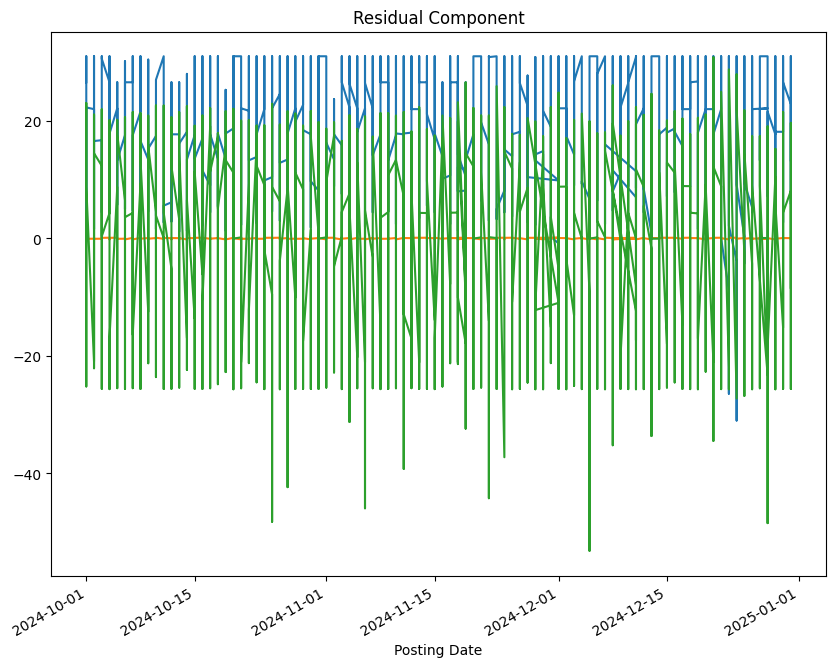

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load cleaned dataset
df = pd.read_excel("/content/Forecast2.xlsx")

# Convert Posting Date to datetime and set as index
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df.set_index('Posting Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Qty in Un. of Entry'], model='additive', period=7)  # Weekly pattern

# Plot results
plt.figure(figsize=(10, 8))
decomposition.trend.plot(title="Trend Component")
decomposition.seasonal.plot(title="Seasonal Component")
decomposition.resid.plot(title="Residual Component")
plt.show()

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

# Load cleaned dataset
df = pd.read_excel("/content/Forecast2.xlsx")

# Convert Posting Date to datetime and set as index
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df.set_index('Posting Date', inplace=True)

# Sort data by date
df = df.sort_index()

### Feature Engineering ###
def create_features(data):
    df = data.copy()

    # Drop unnecessary non-numeric columns
    drop_cols = ['Material', 'Material Description', 'Unit of Entry', 'Plant',
                 'Storage Location', 'Reference', 'Time of Entry', 'Name 1',
                 'Base Unit of Measure', 'Batch', 'Currency', 'Debit/Credit Ind.',
                 'User name', 'Document Header Text']
    df.drop(columns=drop_cols, errors='ignore', inplace=True)  # Ignore if columns are missing

    # Convert categorical columns to numeric codes
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype('category').cat.codes  # Convert text to numeric

    # Convert datetime columns to numerical features
    if 'Document Date' in df.columns:
        df['Document Date'] = pd.to_datetime(df['Document Date'])
        df['doc_year'] = df['Document Date'].dt.year
        df['doc_month'] = df['Document Date'].dt.month
        df['doc_day'] = df['Document Date'].dt.day
        df.drop(columns=['Document Date'], inplace=True)  # Drop original column

    if 'Entry Date' in df.columns:
        df['Entry Date'] = pd.to_datetime(df['Entry Date'])
        df['entry_year'] = df['Entry Date'].dt.year
        df['entry_month'] = df['Entry Date'].dt.month
        df['entry_day'] = df['Entry Date'].dt.day
        df.drop(columns=['Entry Date'], inplace=True)  # Drop original column

    # Lag Features
    for lag in [1, 7, 14]:
        df[f'lag_{lag}'] = df['Qty in Un. of Entry'].shift(lag)

    # Rolling Mean Features
    df['rolling_mean_7'] = df['Qty in Un. of Entry'].rolling(window=7, min_periods=1).mean()
    df['rolling_mean_14'] = df['Qty in Un. of Entry'].rolling(window=14, min_periods=1).mean()

    # Date-based Features
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month

    # Fill NaN values
    df.bfill(inplace=True)  # Backfill missing values

    return df

df_features = create_features(df)

# Define Features & Target
X = df_features.drop(columns=['Qty in Un. of Entry'])
y = df_features['Qty in Un. of Entry']

# Debug: Check dtypes
print("Feature Data Types:\n", X.dtypes)

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train LightGBM Model
model = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.05)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
r2_lgbm = r2_score(y_test, y_pred)

print("LightGBM R² Score:", r2_lgbm)

Feature Data Types:
 Material Document                   int64
Movement Type                       int64
Purchase Order                    float64
Vendor                            float64
Order Price Unit                  float64
Special Stock                     float64
Asset                             float64
WBS Element                       float64
Amount in LC                      float64
Company Code                        int64
Consumption                       float64
Cost Center                       float64
Counter                             int64
Customer                          float64
Item                                int64
Item No.Stock Transfer Reserv.      int64
Material Doc. Year                  int64
Reservation                         int64
Receipt Indicator                 float64
Reason for Movement                 int64
doc_year                            int32
doc_month                           int32
doc_day                             int32
entry_year   

In [ ]:

import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

# Load cleaned dataset
df = pd.read_excel("/content/Forecast2.xlsx")

# Convert Posting Date to datetime and set as index
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df.set_index('Posting Date', inplace=True)

# Aggregate quantity by date
df = df.groupby(df.index).agg({'Qty in Un. of Entry': 'sum'})

# Sort data by date
df = df.sort_index()

### Feature Engineering ###
def create_features(data):
    df = data.copy()

    # Lag Features
    for lag in [1, 7, 14]:
        df[f'lag_{lag}'] = df['Qty in Un. of Entry'].shift(lag)

    # Rolling Mean Features
    df['rolling_mean_7'] = df['Qty in Un. of Entry'].rolling(window=7, min_periods=1).mean()
    df['rolling_mean_14'] = df['Qty in Un. of Entry'].rolling(window=14, min_periods=1).mean()

    # Date-based Features
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month

    # Fill NaN values
    df.bfill(inplace=True)  # Backfill missing values

    return df

df_features = create_features(df)

# Define Features & Target
X = df_features.drop(columns=['Qty in Un. of Entry'])
y = df_features['Qty in Un. of Entry']

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train LightGBM Model
model = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.05)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
r2_lgbm = r2_score(y_test, y_pred)
print("LightGBM R² Score:", r2_lgbm)

### Forecasting for the Next 30 Days ###
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_df = pd.DataFrame(index=future_dates)
future_df['Qty in Un. of Entry'] = np.nan  # Ensure the column exists

# Use last known values to create feature columns
latest_data = df_features.iloc[-1:].copy()

for date in future_dates:
    new_row = latest_data.copy()
    new_row.index = [date]
    new_row['day_of_week'] = date.dayofweek
    new_row['month'] = date.month

    # Shift lag features safely
    for lag in [1, 7, 14]:
        if lag == 1:
            new_row[f'lag_{lag}'] = latest_data['Qty in Un. of Entry'].values[0]
        else:
            if len(future_df.dropna()) >= lag:
                new_row[f'lag_{lag}'] = future_df['Qty in Un. of Entry'].dropna().iloc[-lag]
            else:
                new_row[f'lag_{lag}'] = latest_data['Qty in Un. of Entry'].values[0]

    # Compute rolling means
    past_data = pd.concat([df['Qty in Un. of Entry'], future_df['Qty in Un. of Entry'].dropna()])
    new_row['rolling_mean_7'] = past_data.rolling(window=7, min_periods=1).mean().iloc[-1]
    new_row['rolling_mean_14'] = past_data.rolling(window=14, min_periods=1).mean().iloc[-1]

    # Predict the next value
    new_row = new_row.drop(columns=['Qty in Un. of Entry'], errors='ignore')
    future_df.loc[date, 'Qty in Un. of Entry'] = model.predict(new_row)[0]

    # Update latest_data for next iteration
    latest_data['Qty in Un. of Entry'] = future_df.loc[date, 'Qty in Un. of Entry']

print("Predicted Quantities for Next 30 Days:")
print(future_df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 73, number of used features: 7
[LightGBM] [Info] Start training from score 4858.438356
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

<ipython-input-5-331b33eb8a8c>:86: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  past_data = pd.concat([df['Qty in Un. of Entry'], future_df['Qty in Un. of Entry'].dropna()])


Predicted Quantities for Next 30 Days:
            Qty in Un. of Entry
2025-01-01          4761.165194
2025-01-02          5140.467963
2025-01-03          4973.479319
2025-01-04          5183.818836
2025-01-05          4973.479319
2025-01-06          5327.312014
2025-01-07          5339.094640
2025-01-08          5009.939266
2025-01-09          4761.165194
2025-01-10          5192.627713
2025-01-11          5041.219606
2025-01-12          4842.941856
2025-01-13          5254.344228
2025-01-14          5339.094640
2025-01-15          4915.721150
2025-01-16          5121.034910
2025-01-17          4847.333055
2025-01-18          5091.417997
2025-01-19          4888.553228
2025-01-20          5255.834100
2025-01-21          5339.094640
2025-01-22          4897.919338
2025-01-23          5110.851051
2025-01-24          5032.136710
2025-01-25          4761.165194
2025-01-26          5192.627713
2025-01-27          5339.094640
2025-01-28          5339.094640
2025-01-29          4906.912274
2

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

# Load cleaned dataset
df = pd.read_excel("/content/Forecast2.xlsx")

# Convert Posting Date to datetime and set as index
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df.set_index('Posting Date', inplace=True)

# Aggregate quantity by date
df = df.groupby(df.index).agg({'Qty in Un. of Entry': 'sum'})

# Sort data by date
df = df.sort_index()

### Feature Engineering ###
def create_features(data):
    df = data.copy()

    # Lag Features
    for lag in [1, 7, 14]:
        df[f'lag_{lag}'] = df['Qty in Un. of Entry'].shift(lag)

    # Rolling Mean Features
    df['rolling_mean_7'] = df['Qty in Un. of Entry'].rolling(window=7, min_periods=1).mean()
    df['rolling_mean_14'] = df['Qty in Un. of Entry'].rolling(window=14, min_periods=1).mean()

    # Date-based Features
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month

    # Fill NaN values
    df.bfill(inplace=True)  # Backfill missing values

    return df

df_features = create_features(df)

# Define Features & Target
X = df_features.drop(columns=['Qty in Un. of Entry'])
y = df_features['Qty in Un. of Entry']

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train LightGBM Model
model = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.05)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
r2_lgbm = r2_score(y_test, y_pred)
print("LightGBM R² Score:", r2_lgbm)

### Forecasting for the Next 30 Days ###
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_df = pd.DataFrame(index=future_dates)
future_df['Qty in Un. of Entry'] = np.nan  # Ensure the column exists

# Use last known values to create feature columns
latest_data = df_features.iloc[-1:].copy()

for date in future_dates:
    new_row = latest_data.copy()
    new_row.index = [date]
    new_row['day_of_week'] = date.dayofweek
    new_row['month'] = date.month

    # Shift lag features safely
    for lag in [1, 7, 14]:
        if lag == 1:
            new_row[f'lag_{lag}'] = latest_data['Qty in Un. of Entry'].values[0]
        else:
            if len(future_df.dropna()) >= lag:
                new_row[f'lag_{lag}'] = future_df['Qty in Un. of Entry'].dropna().iloc[-lag]
            else:
                new_row[f'lag_{lag}'] = latest_data['Qty in Un. of Entry'].values[0]

    # Compute rolling means
    past_data = pd.concat([df['Qty in Un. of Entry'], future_df['Qty in Un. of Entry'].dropna()])
    new_row['rolling_mean_7'] = past_data.rolling(window=7, min_periods=1).mean().iloc[-1]
    new_row['rolling_mean_14'] = past_data.rolling(window=14, min_periods=1).mean().iloc[-1]

    # Predict the next value
    new_row = new_row.drop(columns=['Qty in Un. of Entry'], errors='ignore')
    future_df.loc[date, 'Qty in Un. of Entry'] = model.predict(new_row)[0]

    # Update latest_data for next iteration
    latest_data['Qty in Un. of Entry'] = future_df.loc[date, 'Qty in Un. of Entry']

print("Predicted Quantities for Next 30 Days:")
print(future_df)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 73, number of used features: 7
[LightGBM] [Info] Start training from score 4858.438356
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

<ipython-input-6-331b33eb8a8c>:86: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  past_data = pd.concat([df['Qty in Un. of Entry'], future_df['Qty in Un. of Entry'].dropna()])


In [ ]:
!pip install lightgbm --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.0 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0


In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

# Load cleaned dataset
df = pd.read_excel("/content/Forecast2.xlsx")

# Convert Posting Date to datetime and set as index
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df.set_index('Posting Date', inplace=True)

# Aggregate quantity by date
df = df.groupby(df.index).agg({'Qty in Un. of Entry': 'sum'})

# Sort data by date
df = df.sort_index()

### Feature Engineering ###
def create_features(data):
    df = data.copy()

    # Lag Features
    for lag in [1, 3, 5, 7, 10, 14]:
        df[f'lag_{lag}'] = df['Qty in Un. of Entry'].shift(lag)

    # Rolling Mean Features
    df['rolling_mean_7'] = df['Qty in Un. of Entry'].rolling(window=7, min_periods=1).mean()
    df['rolling_mean_14'] = df['Qty in Un. of Entry'].rolling(window=14, min_periods=1).mean()
    df['ema_7'] = df['Qty in Un. of Entry'].ewm(span=7, adjust=False).mean()
    df['ema_14'] = df['Qty in Un. of Entry'].ewm(span=14, adjust=False).mean()

    # Date-based Features
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month

    # Fill NaN values
    df.bfill(inplace=True)  # Backfill missing values

    return df

df_features = create_features(df)

# Define Features & Target
X = df_features.drop(columns=['Qty in Un. of Entry'])
y = df_features['Qty in Un. of Entry']

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train LightGBM Model
model = lgb.LGBMRegressor(n_estimators=500, learning_rate=0.03, num_leaves=31, min_child_samples=20)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
r2_lgbm = r2_score(y_test, y_pred)
print("LightGBM R² Score:", r2_lgbm)

### Forecasting for the Next 30 Days ###
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_df = pd.DataFrame(index=future_dates)
future_df['Qty in Un. of Entry'] = np.nan  # Ensure the column exists

# Use last known values to create feature columns
latest_data = df_features.iloc[-1:].copy()

for date in future_dates:
    new_row = latest_data.copy()
    new_row.index = [date]
    new_row['day_of_week'] = date.dayofweek
    new_row['month'] = date.month

    # Shift lag features safely
    for lag in [1, 3, 5, 7, 10, 14]:
        if len(future_df.dropna()) >= lag:
            new_row[f'lag_{lag}'] = future_df['Qty in Un. of Entry'].dropna().iloc[-lag]
        else:
            new_row[f'lag_{lag}'] = latest_data['Qty in Un. of Entry'].values[0]

    # Compute rolling means and EMAs
    past_data = pd.concat([df['Qty in Un. of Entry'], future_df['Qty in Un. of Entry'].dropna()])
    new_row['rolling_mean_7'] = past_data.rolling(window=7, min_periods=1).mean().iloc[-1]
    new_row['rolling_mean_14'] = past_data.rolling(window=14, min_periods=1).mean().iloc[-1]
    new_row['ema_7'] = past_data.ewm(span=7, adjust=False).mean().iloc[-1]
    new_row['ema_14'] = past_data.ewm(span=14, adjust=False).mean().iloc[-1]

    # Predict the next value
    new_row = new_row.drop(columns=['Qty in Un. of Entry'], errors='ignore')
    future_df.loc[date, 'Qty in Un. of Entry'] = model.predict(new_row)[0]

    # Update latest_data for next iteration
    latest_data['Qty in Un. of Entry'] = future_df.loc[date, 'Qty in Un. of Entry']

print("Predicted Quantities for Next 30 Days:")
print(future_df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 244
[LightGBM] [Info] Number of data points in the train set: 73, number of used features: 12
[LightGBM] [Info] Start training from score 4858.438356
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

<ipython-input-7-bfe71f0f0e07>:85: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  past_data = pd.concat([df['Qty in Un. of Entry'], future_df['Qty in Un. of Entry'].dropna()])


Predicted Quantities for Next 30 Days:
            Qty in Un. of Entry
2025-01-01          4989.918871
2025-01-02          5158.666443
2025-01-03          5067.492867
2025-01-04          5107.447127
2025-01-05          5097.393125
2025-01-06          5339.014760
2025-01-07          5378.486064
2025-01-08          5187.448374
2025-01-09          5067.492867
2025-01-10          5032.722540
2025-01-11          4900.877610
2025-01-12          5210.678953
2025-01-13          5384.583418
2025-01-14          5384.583418
2025-01-15          4910.498045
2025-01-16          5220.011639
2025-01-17          5095.301906
2025-01-18          5214.223677
2025-01-19          5043.973633
2025-01-20          5446.078667
2025-01-21          5268.427116
2025-01-22          5226.406347
2025-01-23          5043.973633
2025-01-24          4938.758838
2025-01-25          5119.398892
2025-01-26          5165.409091
2025-01-27          5384.583418
2025-01-28          5378.486064
2025-01-29          4910.498045
2

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

# Load cleaned dataset
df = pd.read_excel("/content/Forecast2.xlsx")

# Convert Posting Date to datetime and set as index
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df.set_index('Posting Date', inplace=True)

# Aggregate quantity by date
df = df.groupby(df.index).agg({'Qty in Un. of Entry': 'sum'})

# Sort data by date
df = df.sort_index()

### Feature Engineering ###
def create_features(data):
    df = data.copy()

    # Lag Features
    for lag in [1, 3, 5, 7, 10, 14, 21, 28]:
        df[f'lag_{lag}'] = df['Qty in Un. of Entry'].shift(lag)

    # Rolling Mean & Exponential Moving Averages (EMA)
    df['rolling_mean_7'] = df['Qty in Un. of Entry'].rolling(window=7, min_periods=1).mean()
    df['rolling_mean_14'] = df['Qty in Un. of Entry'].rolling(window=14, min_periods=1).mean()
    df['ema_7'] = df['Qty in Un. of Entry'].ewm(span=7, adjust=False).mean()
    df['ema_14'] = df['Qty in Un. of Entry'].ewm(span=14, adjust=False).mean()

    # Date-based Features
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month

    # Fill NaN values
    df.bfill(inplace=True)  # Backfill missing values

    return df

df_features = create_features(df)

# Define Features & Target
X = df_features.drop(columns=['Qty in Un. of Entry'])
y = df_features['Qty in Un. of Entry']

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train LightGBM Model with optimized hyperparameters
model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.01, num_leaves=50, min_child_samples=10, subsample=0.8, colsample_bytree=0.8)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
r2_lgbm = r2_score(y_test, y_pred)
print("LightGBM R² Score:", r2_lgbm)

### Forecasting for the Next 30 Days ###
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_df = pd.DataFrame(index=future_dates)
future_df['Qty in Un. of Entry'] = np.nan  # Ensure the column exists

# Use last known values to create feature columns
latest_data = df_features.iloc[-1:].copy()

for date in future_dates:
    new_row = latest_data.copy()
    new_row.index = [date]
    new_row['day_of_week'] = date.dayofweek
    new_row['month'] = date.month

    # Shift lag features safely
    for lag in [1, 3, 5, 7, 10, 14, 21, 28]:
        if len(future_df.dropna()) >= lag:
            new_row[f'lag_{lag}'] = future_df['Qty in Un. of Entry'].dropna().iloc[-lag]
        else:
            new_row[f'lag_{lag}'] = latest_data['Qty in Un. of Entry'].values[0]

    # Compute rolling means and EMAs
    past_data = pd.concat([df['Qty in Un. of Entry'], future_df['Qty in Un. of Entry'].dropna()])
    new_row['rolling_mean_7'] = past_data.rolling(window=7, min_periods=1).mean().iloc[-1]
    new_row['rolling_mean_14'] = past_data.rolling(window=14, min_periods=1).mean().iloc[-1]
    new_row['ema_7'] = past_data.ewm(span=7, adjust=False).mean().iloc[-1]
    new_row['ema_14'] = past_data.ewm(span=14, adjust=False).mean().iloc[-1]

    # Predict the next value
    new_row = new_row.drop(columns=['Qty in Un. of Entry'], errors='ignore')
    future_df.loc[date, 'Qty in Un. of Entry'] = model.predict(new_row)[0]

    # Update latest_data for next iteration
    latest_data['Qty in Un. of Entry'] = future_df.loc[date, 'Qty in Un. of Entry']

print("Predicted Quantities for Next 30 Days:")
print(future_df)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 278
[LightGBM] [Info] Number of data points in the train set: 73, number of used features: 14
[LightGBM] [Info] Start training from score 4858.438356
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

<ipython-input-8-e26ac1ce586c>:85: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  past_data = pd.concat([df['Qty in Un. of Entry'], future_df['Qty in Un. of Entry'].dropna()])


Predicted Quantities for Next 30 Days:
            Qty in Un. of Entry
2025-01-01          5248.935740
2025-01-02          5094.832377
2025-01-03          5092.741756
2025-01-04          5104.223529
2025-01-05          5181.571873
2025-01-06          5404.939084
2025-01-07          5345.845573
2025-01-08          5108.602215
2025-01-09          5165.681764
2025-01-10          5048.594300
2025-01-11          5231.795801
2025-01-12          5084.958075
2025-01-13          5401.254084
2025-01-14          5350.717300
2025-01-15          5115.665861
2025-01-16          5150.228174
2025-01-17          5048.287369
2025-01-18          5191.752197
2025-01-19          5064.288567
2025-01-20          5465.931297
2025-01-21          5364.587669
2025-01-22          5110.315545
2025-01-23          5161.463342
2025-01-24          5011.008223
2025-01-25          5156.683938
2025-01-26          5066.074325
2025-01-27          5483.345606
2025-01-28          5350.717300
2025-01-29          5116.848530
2

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

# Load cleaned dataset
df = pd.read_excel("/content/Forecast2.xlsx")

# Convert Posting Date to datetime and set as index
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df.set_index('Posting Date', inplace=True)

# Aggregate quantity by date
df = df.groupby(df.index).agg({'Qty in Un. of Entry': 'sum'})

# Sort data by date
df = df.sort_index()

### Feature Engineering ###
def create_features(data):
    df = data.copy()

    # Lag Features
    for lag in [1, 3, 5, 7, 10, 14, 21, 28]:
        df[f'lag_{lag}'] = df['Qty in Un. of Entry'].shift(lag)

    # Rolling Mean & Exponential Moving Averages (EMA)
    df['rolling_mean_7'] = df['Qty in Un. of Entry'].rolling(window=7, min_periods=1).mean()
    df['rolling_mean_14'] = df['Qty in Un. of Entry'].rolling(window=14, min_periods=1).mean()
    df['ema_7'] = df['Qty in Un. of Entry'].ewm(span=7, adjust=False).mean()
    df['ema_14'] = df['Qty in Un. of Entry'].ewm(span=14, adjust=False).mean()

    # Date-based Features
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month

    # Fill NaN values
    df.bfill(inplace=True)  # Backfill missing values

    return df

df_features = create_features(df)

# Define Features & Target
X = df_features.drop(columns=['Qty in Un. of Entry'])
y = df_features['Qty in Un. of Entry']

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train LightGBM Model with optimized hyperparameters
model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.01, num_leaves=50, min_child_samples=10, subsample=0.8, colsample_bytree=0.8)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
r2_lgbm = r2_score(y_test, y_pred)
print("LightGBM R² Score:", r2_lgbm)

### Forecasting for the Next 30 Days ###
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_df = pd.DataFrame(index=future_dates)
future_df['Qty in Un. of Entry'] = np.nan  # Ensure the column exists

# Use last known values to create feature columns
latest_data = df_features.iloc[-1:].copy()

for date in future_dates:
    new_row = latest_data.copy()
    new_row.index = [date]
    new_row['day_of_week'] = date.dayofweek
    new_row['month'] = date.month

    # Shift lag features safely
    for lag in [1, 3, 5, 7, 10, 14, 21, 28]:
        if len(future_df.dropna()) >= lag:
            new_row[f'lag_{lag}'] = future_df['Qty in Un. of Entry'].dropna().iloc[-lag]
        else:
            new_row[f'lag_{lag}'] = latest_data['Qty in Un. of Entry'].values[0]

    # Compute rolling means and EMAs
    past_data = pd.concat([df['Qty in Un. of Entry'], future_df['Qty in Un. of Entry'].dropna()])
    new_row['rolling_mean_7'] = past_data.rolling(window=7, min_periods=1).mean().iloc[-1]
    new_row['rolling_mean_14'] = past_data.rolling(window=14, min_periods=1).mean().iloc[-1]
    new_row['ema_7'] = past_data.ewm(span=7, adjust=False).mean().iloc[-1]
    new_row['ema_14'] = past_data.ewm(span=14, adjust=False).mean().iloc[-1]

    # Predict the next value
    new_row = new_row.drop(columns=['Qty in Un. of Entry'], errors='ignore')
    future_df.loc[date, 'Qty in Un. of Entry'] = model.predict(new_row)[0]

    # Update latest_data for next iteration
    latest_data['Qty in Un. of Entry'] = future_df.loc[date, 'Qty in Un. of Entry']

print("Predicted Quantities for Next 30 Days:")
print(future_df)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 278
[LightGBM] [Info] Number of data points in the train set: 73, number of used features: 14
[LightGBM] [Info] Start training from score 4858.438356
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

<ipython-input-9-e26ac1ce586c>:85: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  past_data = pd.concat([df['Qty in Un. of Entry'], future_df['Qty in Un. of Entry'].dropna()])


Predicted Quantities for Next 30 Days:
            Qty in Un. of Entry
2025-01-01          5248.935740
2025-01-02          5094.832377
2025-01-03          5092.741756
2025-01-04          5104.223529
2025-01-05          5181.571873
2025-01-06          5404.939084
2025-01-07          5345.845573
2025-01-08          5108.602215
2025-01-09          5165.681764
2025-01-10          5048.594300
2025-01-11          5231.795801
2025-01-12          5084.958075
2025-01-13          5401.254084
2025-01-14          5350.717300
2025-01-15          5115.665861
2025-01-16          5150.228174
2025-01-17          5048.287369
2025-01-18          5191.752197
2025-01-19          5064.288567
2025-01-20          5465.931297
2025-01-21          5364.587669
2025-01-22          5110.315545
2025-01-23          5161.463342
2025-01-24          5011.008223
2025-01-25          5156.683938
2025-01-26          5066.074325
2025-01-27          5483.345606
2025-01-28          5350.717300
2025-01-29          5116.848530
2

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

# Load cleaned dataset
df = pd.read_excel("/content/Forecast2.xlsx")

# Convert Posting Date to datetime and set as index
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df.set_index('Posting Date', inplace=True)

# Aggregate quantity by date
df = df.groupby(df.index).agg({'Qty in Un. of Entry': 'sum'})

# Sort data by date
df = df.sort_index()

### Feature Engineering ###
def create_features(data):
    df = data.copy()

    # Lag Features
    for lag in [1, 3, 5, 7, 10, 14]:
        df[f'lag_{lag}'] = df['Qty in Un. of Entry'].shift(lag)

    # Rolling Mean & Exponential Moving Averages (EMA)
    df['rolling_mean_7'] = df['Qty in Un. of Entry'].rolling(window=7, min_periods=1).mean()
    df['rolling_mean_14'] = df['Qty in Un. of Entry'].rolling(window=14, min_periods=1).mean()
    df['ema_7'] = df['Qty in Un. of Entry'].ewm(span=7, adjust=False).mean()
    df['ema_14'] = df['Qty in Un. of Entry'].ewm(span=14, adjust=False).mean()

    # Date-based Features
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month

    # Fill NaN values
    df.bfill(inplace=True)  # Backfill missing values

    return df

df_features = create_features(df)

# Define Features & Target
X = df_features.drop(columns=['Qty in Un. of Entry'])
y = df_features['Qty in Un. of Entry']

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train LightGBM Model with optimized hyperparameters
model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.01, num_leaves=50, min_child_samples=10, subsample=0.8, colsample_bytree=0.8)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
r2_lgbm = r2_score(y_test, y_pred)
print("LightGBM R² Score:", r2_lgbm)

### Forecasting for the Next 30 Days ###
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_df = pd.DataFrame(index=future_dates)
future_df['Qty in Un. of Entry'] = np.nan  # Ensure the column exists

# Use last known values to create feature columns
latest_data = df_features.iloc[-1:].copy()

for date in future_dates:
    new_row = latest_data.copy()
    new_row.index = [date]
    new_row['day_of_week'] = date.dayofweek
    new_row['month'] = date.month

    # Shift lag features safely
    for lag in [1, 3, 5, 7, 10, 14]:
        if len(future_df.dropna()) >= lag:
            new_row[f'lag_{lag}'] = future_df['Qty in Un. of Entry'].dropna().iloc[-lag]
        else:
            new_row[f'lag_{lag}'] = latest_data['Qty in Un. of Entry'].values[0]

    # Compute rolling means and EMAs
    past_data = pd.concat([df['Qty in Un. of Entry'], future_df['Qty in Un. of Entry'].dropna()])
    new_row['rolling_mean_7'] = past_data.rolling(window=7, min_periods=1).mean().iloc[-1]
    new_row['rolling_mean_14'] = past_data.rolling(window=14, min_periods=1).mean().iloc[-1]
    new_row['ema_7'] = past_data.ewm(span=7, adjust=False).mean().iloc[-1]
    new_row['ema_14'] = past_data.ewm(span=14, adjust=False).mean().iloc[-1]

    # Predict the next value
    new_row = new_row.drop(columns=['Qty in Un. of Entry'], errors='ignore')
    future_df.loc[date, 'Qty in Un. of Entry'] = model.predict(new_row)[0]

    # Update latest_data for next iteration
    latest_data['Qty in Un. of Entry'] = future_df.loc[date, 'Qty in Un. of Entry']

print("Predicted Quantities for Next 30 Days:")
print(future_df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 244
[LightGBM] [Info] Number of data points in the train set: 73, number of used features: 12
[LightGBM] [Info] Start training from score 4858.438356
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

<ipython-input-10-309bb4f52021>:85: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  past_data = pd.concat([df['Qty in Un. of Entry'], future_df['Qty in Un. of Entry'].dropna()])


Predicted Quantities for Next 30 Days:
            Qty in Un. of Entry
2025-01-01          5216.695217
2025-01-02          5043.079248
2025-01-03          5181.953217
2025-01-04          5043.464535
2025-01-05          5191.053098
2025-01-06          5355.141697
2025-01-07          5368.807465
2025-01-08          5131.215620
2025-01-09          5013.264625
2025-01-10          5184.299398
2025-01-11          5024.156339
2025-01-12          5276.007081
2025-01-13          5404.057060
2025-01-14          5441.176802
2025-01-15          5127.463581
2025-01-16          4992.993614
2025-01-17          5191.855609
2025-01-18          4974.997885
2025-01-19          5299.941800
2025-01-20          5404.057060
2025-01-21          5469.608604
2025-01-22          5101.084266
2025-01-23          5123.177992
2025-01-24          5043.204882
2025-01-25          5186.661229
2025-01-26          4978.749645
2025-01-27          5435.507187
2025-01-28          5310.601453
2025-01-29          5155.257463
2

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import r2_score
import numpy as np
from skopt import BayesSearchCV

# Load cleaned dataset
df = pd.read_excel("/content/Forecast2.xlsx")

# Convert Posting Date to datetime and set as index
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df.set_index('Posting Date', inplace=True)

# Aggregate quantity by date
df = df.groupby(df.index).agg({'Qty in Un. of Entry': 'sum'})

# Sort data by date
df = df.sort_index()

### Feature Engineering ###
def create_features(data):
    df = data.copy()

    # Lag Features
    for lag in [1, 3, 5, 7, 10]:
        df[f'lag_{lag}'] = df['Qty in Un. of Entry'].shift(lag)

    # Rolling Mean & Exponential Moving Averages (EMA)
    df['rolling_mean_7'] = df['Qty in Un. of Entry'].rolling(window=7, min_periods=1).mean()
    df['rolling_mean_14'] = df['Qty in Un. of Entry'].rolling(window=14, min_periods=1).mean()
    df['ema_7'] = df['Qty in Un. of Entry'].ewm(span=7, adjust=False).mean()
    df['ema_14'] = df['Qty in Un. of Entry'].ewm(span=14, adjust=False).mean()

    # Date-based Features
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month

    # Fill NaN values
    df.bfill(inplace=True)  # Backfill missing values

    return df

df_features = create_features(df)

# Define Features & Target
X = df_features.drop(columns=['Qty in Un. of Entry'])
y = df_features['Qty in Un. of Entry']

# Time Series Split for Better Generalization
tscv = TimeSeriesSplit(n_splits=5)

# Bayesian Optimization for Hyperparameter Tuning
param_space = {
    'n_estimators': (500, 2000),
    'learning_rate': (0.01, 0.1, 'log-uniform'),
    'num_leaves': (31, 150),
    'min_child_samples': (10, 50),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

bayes_search = BayesSearchCV(
    lgb.LGBMRegressor(),
    param_space,
    n_iter=50,
    cv=tscv,
    n_jobs=-1
)

bayes_search.fit(X, y)
best_params = bayes_search.best_params_

# Train LightGBM Model with best parameters
model = lgb.LGBMRegressor(**best_params)
model.fit(X, y)

# Make Predictions
y_pred = model.predict(X)

# Evaluate Model
r2_lgbm = r2_score(y, y_pred)
print("LightGBM R² Score:", r2_lgbm)

### Forecasting for the Next 30 Days ###
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_df = pd.DataFrame(index=future_dates)
future_df['Qty in Un. of Entry'] = np.nan  # Ensure the column exists

# Use last known values to create feature columns
latest_data = df_features.iloc[-1:].copy()

for date in future_dates:
    new_row = latest_data.copy()
    new_row.index = [date]
    new_row['day_of_week'] = date.dayofweek
    new_row['month'] = date.month

    # Shift lag features safely
    for lag in [1, 3, 5, 7, 10]:
        if len(future_df.dropna()) >= lag:
            new_row[f'lag_{lag}'] = future_df['Qty in Un. of Entry'].dropna().iloc[-lag]
        else:
            new_row[f'lag_{lag}'] = latest_data['Qty in Un. of Entry'].values[0]

    # Compute rolling means and EMAs
    past_data = pd.concat([df['Qty in Un. of Entry'], future_df['Qty in Un. of Entry'].dropna()])
    new_row['rolling_mean_7'] = past_data.rolling(window=7, min_periods=1).mean().iloc[-1]
    new_row['rolling_mean_14'] = past_data.rolling(window=14, min_periods=1).mean().iloc[-1]
    new_row['ema_7'] = past_data.ewm(span=7, adjust=False).mean().iloc[-1]
    new_row['ema_14'] = past_data.ewm(span=14, adjust=False).mean().iloc[-1]

    # Predict the next value
    new_row = new_row.drop(columns=['Qty in Un. of Entry'], errors='ignore')
    future_df.loc[date, 'Qty in Un. of Entry'] = model.predict(new_row)[0]

    # Update latest_data for next iteration
    latest_data['Qty in Un. of Entry'] = future_df.loc[date, 'Qty in Un. of Entry']

print("Predicted Quantities for Next 30 Days:")
print(future_df)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 92, number of used features: 10
[LightGBM] [Info] Start training from score 4938.815217
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

<ipython-input-14-ee45daee13b9>:107: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  past_data = pd.concat([df['Qty in Un. of Entry'], future_df['Qty in Un. of Entry'].dropna()])


Predicted Quantities for Next 30 Days:
            Qty in Un. of Entry
2025-01-01          5323.941774
2025-01-02          5146.530654
2025-01-03          5140.178819
2025-01-04          5140.178819
2025-01-05          5140.178819
2025-01-06          5170.059596
2025-01-07          5170.059596
2025-01-08          5170.059596
2025-01-09          5140.178819
2025-01-10          5140.178819
2025-01-11          5140.178819
2025-01-12          5140.178819
2025-01-13          5170.059596
2025-01-14          5170.059596
2025-01-15          5170.059596
2025-01-16          5140.178819
2025-01-17          5140.178819
2025-01-18          5140.178819
2025-01-19          5140.178819
2025-01-20          5170.059596
2025-01-21          5170.059596
2025-01-22          5170.059596
2025-01-23          5140.178819
2025-01-24          5140.178819
2025-01-25          5140.178819
2025-01-26          5140.178819
2025-01-27          5170.059596
2025-01-28          5170.059596
2025-01-29          5170.059596
2

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import r2_score
import numpy as np
from skopt import BayesSearchCV

# Load cleaned dataset
df = pd.read_excel("/content/Forecast2.xlsx")

# Convert Posting Date to datetime and set as index
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df.set_index('Posting Date', inplace=True)

# Aggregate quantity by date
df = df.groupby(df.index).agg({'Qty in Un. of Entry': 'sum'})

# Sort data by date
df = df.sort_index()

### Feature Engineering ###
def create_features(data):
    df = data.copy()

    # Lag Features
    for lag in [1, 3, 5, 7, 10]:
        df[f'lag_{lag}'] = df['Qty in Un. of Entry'].shift(lag)

    # Rolling Mean & Exponential Moving Averages (EMA)
    df['rolling_mean_7'] = df['Qty in Un. of Entry'].rolling(window=7, min_periods=1).mean()
    df['rolling_mean_14'] = df['Qty in Un. of Entry'].rolling(window=14, min_periods=1).mean()
    df['ema_7'] = df['Qty in Un. of Entry'].ewm(span=7, adjust=False).mean()
    df['ema_14'] = df['Qty in Un. of Entry'].ewm(span=14, adjust=False).mean()

    # Date-based Features
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month

    # Fill NaN values
    df.bfill(inplace=True)  # Backfill missing values

    return df

df_features = create_features(df)

# Define Features & Target
X = df_features.drop(columns=['Qty in Un. of Entry'])
y = df_features['Qty in Un. of Entry']

# Time Series Split for Better Generalization
tscv = TimeSeriesSplit(n_splits=5)

# Bayesian Optimization for Hyperparameter Tuning
param_space = {
    'n_estimators': (500, 2000),
    'learning_rate': (0.01, 0.1, 'log-uniform'),
    'num_leaves': (31, 150),
    'min_child_samples': (10, 50),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

bayes_search = BayesSearchCV(
    lgb.LGBMRegressor(),
    param_space,
    n_iter=50,
    cv=tscv,
    n_jobs=-1
)

bayes_search.fit(X, y)
best_params = bayes_search.best_params_

# Train LightGBM Model with best parameters
model = lgb.LGBMRegressor(**best_params)
model.fit(X, y)

# Make Predictions
y_pred = model.predict(X)

# Evaluate Model
r2_lgbm = r2_score(y, y_pred)
print("LightGBM R² Score:", r2_lgbm)

### Forecasting for the Next 30 Days ###
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_df = pd.DataFrame(index=future_dates)
future_df['Qty in Un. of Entry'] = np.nan  # Ensure the column exists

# Use last known values to create feature columns
latest_data = df_features.iloc[-1:].copy()

for date in future_dates:
    new_row = latest_data.copy()
    new_row.index = [date]
    new_row['day_of_week'] = date.dayofweek
    new_row['month'] = date.month

    # Shift lag features safely
    for lag in [1, 3, 5, 7, 10]:
        if len(future_df.dropna()) >= lag:
            new_row[f'lag_{lag}'] = future_df['Qty in Un. of Entry'].dropna().iloc[-lag]
        else:
            new_row[f'lag_{lag}'] = latest_data['Qty in Un. of Entry'].values[0]

    # Compute rolling means and EMAs
    past_data = pd.concat([df['Qty in Un. of Entry'], future_df['Qty in Un. of Entry'].dropna()])
    new_row['rolling_mean_7'] = past_data.rolling(window=7, min_periods=1).mean().iloc[-1]
    new_row['rolling_mean_14'] = past_data.rolling(window=14, min_periods=1).mean().iloc[-1]
    new_row['ema_7'] = past_data.ewm(span=7, adjust=False).mean().iloc[-1]
    new_row['ema_14'] = past_data.ewm(span=14, adjust=False).mean().iloc[-1]

    # Predict the next value
    new_row = new_row.drop(columns=['Qty in Un. of Entry'], errors='ignore')
    future_df.loc[date, 'Qty in Un. of Entry'] = model.predict(new_row)[0]

    # Update latest_data for next iteration
    latest_data['Qty in Un. of Entry'] = future_df.loc[date, 'Qty in Un. of Entry']

print("Predicted Quantities for Next 30 Days:")
print(future_df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 92, number of used features: 10
[LightGBM] [Info] Start training from score 4938.815217
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

<ipython-input-15-ee45daee13b9>:107: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  past_data = pd.concat([df['Qty in Un. of Entry'], future_df['Qty in Un. of Entry'].dropna()])


Predicted Quantities for Next 30 Days:
            Qty in Un. of Entry
2025-01-01          5320.271988
2025-01-02          5159.999227
2025-01-03          5159.999227
2025-01-04          5159.999227
2025-01-05          5159.999227
2025-01-06          5165.752769
2025-01-07          5165.752769
2025-01-08          5165.752769
2025-01-09          5159.999227
2025-01-10          5159.999227
2025-01-11          5159.999227
2025-01-12          5159.999227
2025-01-13          5165.752769
2025-01-14          5165.752769
2025-01-15          5165.752769
2025-01-16          5159.999227
2025-01-17          5159.999227
2025-01-18          5159.999227
2025-01-19          5159.999227
2025-01-20          5165.752769
2025-01-21          5165.752769
2025-01-22          5165.752769
2025-01-23          5159.999227
2025-01-24          5159.999227
2025-01-25          5159.999227
2025-01-26          5159.999227
2025-01-27          5165.752769
2025-01-28          5165.752769
2025-01-29          5165.752769
2

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import r2_score
import numpy as np
from skopt import BayesSearchCV

# Load cleaned dataset
df = pd.read_excel("/content/Forecast2.xlsx")

# Convert Posting Date to datetime and set as index
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df.set_index('Posting Date', inplace=True)

# Aggregate quantity by date
df = df.groupby(df.index).agg({'Qty in Un. of Entry': 'sum'})

# Sort data by date
df = df.sort_index()

### Feature Engineering ###
def create_features(data):
    df = data.copy()

    # Lag Features
    for lag in [1, 3, 5, 7]:
        df[f'lag_{lag}'] = df['Qty in Un. of Entry'].shift(lag)

    # Rolling Mean & Exponential Moving Averages (EMA)
    df['rolling_mean_7'] = df['Qty in Un. of Entry'].rolling(window=7, min_periods=1).mean()
    df['rolling_mean_14'] = df['Qty in Un. of Entry'].rolling(window=14, min_periods=1).mean()
    df['ema_7'] = df['Qty in Un. of Entry'].ewm(span=7, adjust=False).mean()
    df['ema_14'] = df['Qty in Un. of Entry'].ewm(span=14, adjust=False).mean()

    # Date-based Features
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month

    # Fill NaN values
    df.bfill(inplace=True)  # Backfill missing values

    return df

df_features = create_features(df)

# Define Features & Target
X = df_features.drop(columns=['Qty in Un. of Entry'])
y = df_features['Qty in Un. of Entry']

# Time Series Split for Better Generalization
tscv = TimeSeriesSplit(n_splits=5)

# Bayesian Optimization for Hyperparameter Tuning
param_space = {
    'n_estimators': (1000, 3000),
    'learning_rate': (0.01, 0.2, 'log-uniform'),
    'num_leaves': (31, 200),
    'min_child_samples': (5, 50),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

bayes_search = BayesSearchCV(
    lgb.LGBMRegressor(),
    param_space,
    n_iter=70,
    cv=tscv,
    n_jobs=-1
)

bayes_search.fit(X, y)
best_params = bayes_search.best_params_

# Train LightGBM Model with best parameters
model = lgb.LGBMRegressor(**best_params)
model.fit(X, y)

# Make Predictions
y_pred = model.predict(X)

# Evaluate Model
r2_lgbm = r2_score(y, y_pred)
print("LightGBM R² Score:", r2_lgbm)

### Forecasting for the Next 30 Days ###
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_df = pd.DataFrame(index=future_dates)
future_df['Qty in Un. of Entry'] = np.nan  # Ensure the column exists

# Use last known values to create feature columns
latest_data = df_features.iloc[-1:].copy()

for date in future_dates:
    new_row = latest_data.copy()
    new_row.index = [date]
    new_row['day_of_week'] = date.dayofweek
    new_row['month'] = date.month

    # Shift lag features safely
    for lag in [1, 3, 5, 7]:
        if len(future_df.dropna()) >= lag:
            new_row[f'lag_{lag}'] = future_df['Qty in Un. of Entry'].dropna().iloc[-lag]
        else:
            new_row[f'lag_{lag}'] = latest_data['Qty in Un. of Entry'].values[0]

    # Compute rolling means and EMAs
    past_data = pd.concat([df['Qty in Un. of Entry'], future_df['Qty in Un. of Entry'].dropna()])
    new_row['rolling_mean_7'] = past_data.rolling(window=7, min_periods=1).mean().iloc[-1]
    new_row['rolling_mean_14'] = past_data.rolling(window=14, min_periods=1).mean().iloc[-1]
    new_row['ema_7'] = past_data.ewm(span=7, adjust=False).mean().iloc[-1]
    new_row['ema_14'] = past_data.ewm(span=14, adjust=False).mean().iloc[-1]

    # Predict the next value
    new_row = new_row.drop(columns=['Qty in Un. of Entry'], errors='ignore')
    future_df.loc[date, 'Qty in Un. of Entry'] = model.predict(new_row)[0]

    # Update latest_data for next iteration
    latest_data['Qty in Un. of Entry'] = future_df.loc[date, 'Qty in Un. of Entry']

print("Predicted Quantities for Next 30 Days:")
print(future_df)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

<ipython-input-16-fcedf3c7a657>:107: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  past_data = pd.concat([df['Qty in Un. of Entry'], future_df['Qty in Un. of Entry'].dropna()])


Predicted Quantities for Next 30 Days:
            Qty in Un. of Entry
2025-01-01          4781.839346
2025-01-02          5418.142218
2025-01-03          5314.591188
2025-01-04          5148.331554
2025-01-05          5089.268177
2025-01-06          4611.230235
2025-01-07          5567.185680
2025-01-08          5378.989502
2025-01-09          4931.214191
2025-01-10          5675.915851
2025-01-11          5331.307425
2025-01-12          4796.344560
2025-01-13          5942.270955
2025-01-14          5352.728324
2025-01-15          5243.192628
2025-01-16          5059.909696
2025-01-17          4929.761990
2025-01-18          5514.259706
2025-01-19          5419.087664
2025-01-20          5352.450267
2025-01-21          5195.910736
2025-01-22          5352.728324
2025-01-23          5250.994665
2025-01-24          5299.829062
2025-01-25          5314.591188
2025-01-26          5314.591188
2025-01-27          5409.452261
2025-01-28          5409.452261
2025-01-29          5409.452261
2

In [3]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 9.7 MB/s eta 0:00:00


In [4]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import r2_score
import numpy as np
from skopt import BayesSearchCV

# Load cleaned dataset
df = pd.read_excel("/content/Forecast2.xlsx")

# Convert Posting Date to datetime and set as index
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df.set_index('Posting Date', inplace=True)

# Aggregate quantity by date
df = df.groupby(df.index).agg({'Qty in Un. of Entry': 'sum'})

# Sort data by date
df = df.sort_index()

### Feature Engineering ###
def create_features(data):
    df = data.copy()

    # Lag Features
    for lag in [1, 2, 3, 5, 7]:
        df[f'lag_{lag}'] = df['Qty in Un. of Entry'].shift(lag)

    # Rolling Mean & Exponential Moving Averages (EMA)
    df['rolling_mean_5'] = df['Qty in Un. of Entry'].rolling(window=5, min_periods=1).mean()
    df['rolling_mean_10'] = df['Qty in Un. of Entry'].rolling(window=10, min_periods=1).mean()
    df['ema_5'] = df['Qty in Un. of Entry'].ewm(span=5, adjust=False).mean()
    df['ema_10'] = df['Qty in Un. of Entry'].ewm(span=10, adjust=False).mean()

    # Date-based Features
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter

    # Fill NaN values
    df.bfill(inplace=True)  # Backfill missing values

    return df

df_features = create_features(df)

# Define Features & Target
X = df_features.drop(columns=['Qty in Un. of Entry'])
y = df_features['Qty in Un. of Entry']

# Time Series Split for Better Generalization
tscv = TimeSeriesSplit(n_splits=5)

# Bayesian Optimization for Hyperparameter Tuning
param_space = {
    'n_estimators': (1000, 3000),
    'learning_rate': (0.005, 0.05, 'log-uniform'),
    'num_leaves': (50, 200),
    'min_child_samples': (5, 30),
    'subsample': (0.7, 1.0),
    'colsample_bytree': (0.7, 1.0),
    'reg_alpha': (0.0, 1.0),
    'reg_lambda': (0.0, 1.0)
}

bayes_search = BayesSearchCV(
    lgb.LGBMRegressor(),
    param_space,
    n_iter=60,
    cv=tscv,
    n_jobs=-1
)

bayes_search.fit(X, y)
best_params = bayes_search.best_params_

# Train LightGBM Model with best parameters
model = lgb.LGBMRegressor(**best_params)
model.fit(X, y)

# Make Predictions
y_pred = model.predict(X)

# Evaluate Model
r2_lgbm = r2_score(y, y_pred)
print("LightGBM R² Score:", r2_lgbm)

### Forecasting for the Next 30 Days ###
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_df = pd.DataFrame(index=future_dates)
future_df['Qty in Un. of Entry'] = np.nan  # Ensure the column exists

# Use last known values to create feature columns
latest_data = df_features.iloc[-1:].copy()

for date in future_dates:
    new_row = latest_data.copy()
    new_row.index = [date]
    new_row['day_of_week'] = date.dayofweek
    new_row['month'] = date.month
    new_row['quarter'] = date.quarter

    # Shift lag features safely
    for lag in [1, 2, 3, 5, 7]:
        if len(future_df.dropna()) >= lag:
            new_row[f'lag_{lag}'] = future_df['Qty in Un. of Entry'].dropna().iloc[-lag]
        else:
            new_row[f'lag_{lag}'] = latest_data['Qty in Un. of Entry'].values[0]

    # Compute rolling means and EMAs
    past_data = pd.concat([df['Qty in Un. of Entry'], future_df['Qty in Un. of Entry'].dropna()])
    new_row['rolling_mean_5'] = past_data.rolling(window=5, min_periods=1).mean().iloc[-1]
    new_row['rolling_mean_10'] = past_data.rolling(window=10, min_periods=1).mean().iloc[-1]
    new_row['ema_5'] = past_data.ewm(span=5, adjust=False).mean().iloc[-1]
    new_row['ema_10'] = past_data.ewm(span=10, adjust=False).mean().iloc[-1]

    # Predict the next value
    new_row = new_row.drop(columns=['Qty in Un. of Entry'], errors='ignore')
    future_df.loc[date, 'Qty in Un. of Entry'] = model.predict(new_row)[0]

    # Update latest_data for next iteration
    latest_data['Qty in Un. of Entry'] = future_df.loc[date, 'Qty in Un. of Entry']

print("Predicted Quantities for Next 30 Days:")
print(future_df)



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 283
[LightGBM] [Info] Number of data points in the train set: 92, number of used features: 11
[LightGBM] [Info] Start training from score 4938.815217
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

<ipython-input-4-fc37691cd6b7>:111: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  past_data = pd.concat([df['Qty in Un. of Entry'], future_df['Qty in Un. of Entry'].dropna()])


Predicted Quantities for Next 30 Days:
            Qty in Un. of Entry
2025-01-01          5205.225598
2025-01-02          5162.430289
2025-01-03          5153.426456
2025-01-04          5162.430289
2025-01-05          5162.430289
2025-01-06          5209.591054
2025-01-07          5209.591054
2025-01-08          5162.430289
2025-01-09          5162.430289
2025-01-10          5162.430289
2025-01-11          5162.430289
2025-01-12          5162.430289
2025-01-13          5209.591054
2025-01-14          5209.591054
2025-01-15          5162.430289
2025-01-16          5162.430289
2025-01-17          5162.430289
2025-01-18          5162.430289
2025-01-19          5162.430289
2025-01-20          5209.591054
2025-01-21          5209.591054
2025-01-22          5162.430289
2025-01-23          5162.430289
2025-01-24          5162.430289
2025-01-25          5162.430289
2025-01-26          5162.430289
2025-01-27          5209.591054
2025-01-28          5209.591054
2025-01-29          5162.430289
2

In [5]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import r2_score
import numpy as np
from skopt import BayesSearchCV

# Load cleaned dataset
df = pd.read_excel("/content/Forecast2.xlsx")

# Convert Posting Date to datetime and set as index
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df.set_index('Posting Date', inplace=True)

# Aggregate quantity by date
df = df.groupby(df.index).agg({'Qty in Un. of Entry': 'sum'})

# Sort data by date
df = df.sort_index()

### Feature Engineering ###
def create_features(data):
    df = data.copy()

    # Lag Features
    for lag in [1, 2, 3, 5, 7, 10]:
        df[f'lag_{lag}'] = df['Qty in Un. of Entry'].shift(lag)

    # Rolling Mean & Exponential Moving Averages (EMA)
    df['rolling_mean_3'] = df['Qty in Un. of Entry'].rolling(window=3, min_periods=1).mean()
    df['rolling_mean_7'] = df['Qty in Un. of Entry'].rolling(window=7, min_periods=1).mean()
    df['ema_3'] = df['Qty in Un. of Entry'].ewm(span=3, adjust=False).mean()
    df['ema_7'] = df['Qty in Un. of Entry'].ewm(span=7, adjust=False).mean()

    # Date-based Features
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter

    # Fill NaN values
    df.bfill(inplace=True)  # Backfill missing values

    return df

df_features = create_features(df)

# Define Features & Target
X = df_features.drop(columns=['Qty in Un. of Entry'])
y = df_features['Qty in Un. of Entry']

# Time Series Split for Better Generalization
tscv = TimeSeriesSplit(n_splits=5)

# Bayesian Optimization for Hyperparameter Tuning
param_space = {
    'n_estimators': (1500, 4000),
    'learning_rate': (0.001, 0.05, 'log-uniform'),
    'num_leaves': (50, 300),
    'min_child_samples': (5, 40),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0),
    'reg_alpha': (0.0, 2.0),
    'reg_lambda': (0.0, 2.0)
}

bayes_search = BayesSearchCV(
    lgb.LGBMRegressor(),
    param_space,
    n_iter=80,
    cv=tscv,
    n_jobs=-1
)

bayes_search.fit(X, y)
best_params = bayes_search.best_params_

# Train LightGBM Model with best parameters
model = lgb.LGBMRegressor(**best_params)
model.fit(X, y)

# Make Predictions
y_pred = model.predict(X)

# Evaluate Model
r2_lgbm = r2_score(y, y_pred)
print("LightGBM R² Score:", r2_lgbm)

### Forecasting for the Next 30 Days ###
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_df = pd.DataFrame(index=future_dates)
future_df['Qty in Un. of Entry'] = np.nan  # Ensure the column exists

# Use last known values to create feature columns
latest_data = df_features.iloc[-1:].copy()

for date in future_dates:
    new_row = latest_data.copy()
    new_row.index = [date]
    new_row['day_of_week'] = date.dayofweek
    new_row['month'] = date.month
    new_row['quarter'] = date.quarter

    # Shift lag features safely
    for lag in [1, 2, 3, 5, 7, 10]:
        if len(future_df.dropna()) >= lag:
            new_row[f'lag_{lag}'] = future_df['Qty in Un. of Entry'].dropna().iloc[-lag]
        else:
            new_row[f'lag_{lag}'] = latest_data['Qty in Un. of Entry'].values[0]

    # Compute rolling means and EMAs
    past_data = pd.concat([df['Qty in Un. of Entry'], future_df['Qty in Un. of Entry'].dropna()])
    new_row['rolling_mean_3'] = past_data.rolling(window=3, min_periods=1).mean().iloc[-1]
    new_row['rolling_mean_7'] = past_data.rolling(window=7, min_periods=1).mean().iloc[-1]
    new_row['ema_3'] = past_data.ewm(span=3, adjust=False).mean().iloc[-1]
    new_row['ema_7'] = past_data.ewm(span=7, adjust=False).mean().iloc[-1]

    # Predict the next value
    new_row = new_row.drop(columns=['Qty in Un. of Entry'], errors='ignore')
    future_df.loc[date, 'Qty in Un. of Entry'] = model.predict(new_row)[0]

    # Update latest_data for next iteration
    latest_data['Qty in Un. of Entry'] = future_df.loc[date, 'Qty in Un. of Entry']

print("Predicted Quantities for Next 30 Days:")
print(future_df)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 92, number of used features: 12
[LightGBM] [Info] Start training from score 4938.815217
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

<ipython-input-5-98f3752bdf26>:111: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  past_data = pd.concat([df['Qty in Un. of Entry'], future_df['Qty in Un. of Entry'].dropna()])


Predicted Quantities for Next 30 Days:
            Qty in Un. of Entry
2025-01-01          5164.676292
2025-01-02          5146.584016
2025-01-03          5187.461899
2025-01-04          5187.145549
2025-01-05          5234.912542
2025-01-06          5239.596876
2025-01-07          5343.275025
2025-01-08          5523.705831
2025-01-09          5471.577141
2025-01-10          5508.622806
2025-01-11          5521.527950
2025-01-12          5547.315239
2025-01-13          5476.827146
2025-01-14          5609.724143
2025-01-15          5464.059636
2025-01-16          5613.277804
2025-01-17          5464.793220
2025-01-18          5632.834038
2025-01-19          5464.793220
2025-01-20          5619.508797
2025-01-21          5465.493242
2025-01-22          5572.317634
2025-01-23          5446.128560
2025-01-24          5593.745636
2025-01-25          5464.793220
2025-01-26          5592.817111
2025-01-27          5464.180752
2025-01-28          5572.601865
2025-01-29          5464.180752
2

In [10]:

import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import r2_score
import numpy as np
from skopt import BayesSearchCV

# Load cleaned dataset
df = pd.read_excel("/content/Forecast2.xlsx")

# Convert Posting Date to datetime and set as index
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df.set_index('Posting Date', inplace=True)

# Aggregate quantity by date
df = df.groupby(df.index).agg({'Qty in Un. of Entry': 'sum'})

# Sort data by date
df = df.sort_index()

### Feature Engineering ###
def create_features(data):
    df = data.copy()

    if 'Qty in Un. of Entry' not in df.columns:
        df['Qty in Un. of Entry'] = np.nan  # Placeholder for missing values

    # Lag Features
    for lag in [1, 2, 3, 5, 7, 10]:
        df[f'lag_{lag}'] = df['Qty in Un. of Entry'].shift(lag)

    # Rolling Mean & Exponential Moving Averages (EMA)
    df['rolling_mean_3'] = df['Qty in Un. of Entry'].rolling(window=3, min_periods=1).mean()
    df['rolling_mean_7'] = df['Qty in Un. of Entry'].rolling(window=7, min_periods=1).mean()
    df['ema_3'] = df['Qty in Un. of Entry'].ewm(span=3, adjust=False).mean()
    df['ema_7'] = df['Qty in Un. of Entry'].ewm(span=7, adjust=False).mean()

    # Date-based Features
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter

    # Fill NaN values
    df.bfill(inplace=True)  # Backfill missing values

    return df

df_features = create_features(df)

# Define Features & Target
X = df_features.drop(columns=['Qty in Un. of Entry'])
y = df_features['Qty in Un. of Entry']

# Time Series Split for Better Generalization
tscv = TimeSeriesSplit(n_splits=5)

# Bayesian Optimization for Hyperparameter Tuning
param_space = {
    'n_estimators': (1500, 4000),
    'learning_rate': (0.001, 0.05, 'log-uniform'),
    'num_leaves': (50, 300),
    'min_child_samples': (5, 40),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0),
    'reg_alpha': (0.0, 2.0),
    'reg_lambda': (0.0, 2.0)
}

bayes_search = BayesSearchCV(
    lgb.LGBMRegressor(),
    param_space,
    n_iter=80,
    cv=tscv,
    n_jobs=-1
)

bayes_search.fit(X, y)
best_params = bayes_search.best_params_

# Train LightGBM Model with best parameters
model = lgb.LGBMRegressor(**best_params)
model.fit(X, y)

# Make Predictions
y_pred = model.predict(X)

# Evaluate Model
r2_lgbm = r2_score(y, y_pred)
print("LightGBM R² Score:", r2_lgbm)

### Forecasting for the Next 30 Days ###
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_df = pd.DataFrame(index=future_dates)

# Use last known value as the starting point for future predictions
last_known_values = df.iloc[-10:].copy()
future_df = pd.concat([last_known_values, future_df])

# Generate Predictions Iteratively
for date in future_dates:
    future_features = create_features(future_df)
    future_X = future_features.drop(columns=['Qty in Un. of Entry'], errors='ignore')
    future_df.loc[date, 'Qty in Un. of Entry'] = model.predict(future_X.loc[date].values.reshape(1, -1))

# Remove historical data, keeping only future predictions
future_df = future_df.loc[future_dates]

print("Predicted Quantities for Next 30 Days:")
print(future_df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 92, number of used features: 12
[LightGBM] [Info] Start training from score 4938.815217
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [11]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import r2_score
import numpy as np
from skopt import BayesSearchCV

# Load cleaned dataset
df = pd.read_excel("/content/Forecast2.xlsx")

# Convert Posting Date to datetime and set as index
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df.set_index('Posting Date', inplace=True)

# Aggregate quantity by date
df = df.groupby(df.index).agg({'Qty in Un. of Entry': 'sum'})

# Sort data by date
df = df.sort_index()

### Feature Engineering ###
def create_features(data):
    df = data.copy()

    if 'Qty in Un. of Entry' not in df.columns:
        df['Qty in Un. of Entry'] = np.nan  # Placeholder for missing values

    # Lag Features
    for lag in [1, 2, 3, 5, 7, 10]:
        df[f'lag_{lag}'] = df['Qty in Un. of Entry'].shift(lag)

    # Rolling Mean & Exponential Moving Averages (EMA)
    df['rolling_mean_3'] = df['Qty in Un. of Entry'].rolling(window=3, min_periods=1).mean()
    df['rolling_mean_7'] = df['Qty in Un. of Entry'].rolling(window=7, min_periods=1).mean()
    df['ema_3'] = df['Qty in Un. of Entry'].ewm(span=3, adjust=False).mean()
    df['ema_7'] = df['Qty in Un. of Entry'].ewm(span=7, adjust=False).mean()

    # Date-based Features
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter

    # Fill NaN values
    df.bfill(inplace=True)  # Backfill missing values

    return df

df_features = create_features(df)

# Define Features & Target
X = df_features.drop(columns=['Qty in Un. of Entry'])
y = df_features['Qty in Un. of Entry']

# Time Series Split for Better Generalization
tscv = TimeSeriesSplit(n_splits=5)

# Bayesian Optimization for Hyperparameter Tuning
param_space = {
    'n_estimators': (1500, 4000),
    'learning_rate': (0.001, 0.05, 'log-uniform'),
    'num_leaves': (50, 300),
    'min_child_samples': (5, 40),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0),
    'reg_alpha': (0.0, 2.0),
    'reg_lambda': (0.0, 2.0)
}

bayes_search = BayesSearchCV(
    lgb.LGBMRegressor(),
    param_space,
    n_iter=80,
    cv=tscv,
    n_jobs=-1
)

bayes_search.fit(X, y)
best_params = bayes_search.best_params_

# Train LightGBM Model with best parameters
model = lgb.LGBMRegressor(**best_params)
model.fit(X, y)

# Make Predictions
y_pred = model.predict(X)

# Evaluate Model
r2_lgbm = r2_score(y, y_pred)
print("LightGBM R² Score:", r2_lgbm)

### Forecasting for the Next 30 Days ###
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_df = pd.DataFrame(index=future_dates)

# Use last known value as the starting point for future predictions
last_known_values = df.iloc[-10:].copy()
future_df = pd.concat([last_known_values, future_df])

# Generate Predictions Iteratively
for date in future_dates:
    future_features = create_features(future_df)
    future_X = future_features.drop(columns=['Qty in Un. of Entry'], errors='ignore')
    future_df.loc[date, 'Qty in Un. of Entry'] = model.predict(future_X.loc[date].values.reshape(1, -1))

# Remove historical data, keeping only future predictions
future_df = future_df.loc[future_dates]

print("Predicted Quantities for Next 30 Days:")
print(future_df)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11